## Business Case

## Domain Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_val_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('dermatology_35.csv')

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [8]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [9]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [10]:
clinical_features=['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history','Age']
histopathological_features=['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

In [11]:
df['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [12]:
df.loc[df['Age']=='?']

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,?,5


### EDA

In [13]:
x=df.drop('class',axis=1)
y=df['class']

In [14]:
x_cat=[]
for i in x:
    if len(df[i].unique())<10:
        x_cat.append(i)

In [15]:
x_num=list(set(x)-set(x_cat))
x_num

['Age']

#### Data Cleaning

In [16]:
temp_df=df.loc[df['Age']!='?']

In [17]:
len(temp_df['Age'].unique())

60

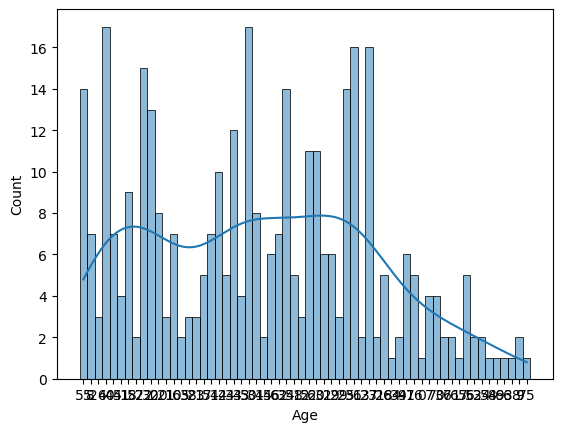

In [18]:
sns.histplot(x=temp_df['Age'],kde=True,bins=20)
plt.show()

In [19]:
temp_df['Age']=temp_df['Age'].astype(dtype='int64')

In [20]:
int(np.median(a=temp_df['Age']))

35

In [21]:
np.mean(a=temp_df['Age'])

36.29608938547486

In [22]:
df.loc[df['Age']=='?','Age']=str(int(np.mean(a=temp_df['Age'])))

In [23]:
df.loc[df['Age']=='?']

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


In [24]:
df['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '36', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '13', '27', '31', '28', '64', '39', '47',
       '16', '0', '7', '70', '37', '61', '67', '56', '53', '24', '58',
       '49', '63', '68', '9', '75'], dtype=object)

In [25]:
df['Age']=df['Age'].astype(dtype='int64')

#### Univariate analysis

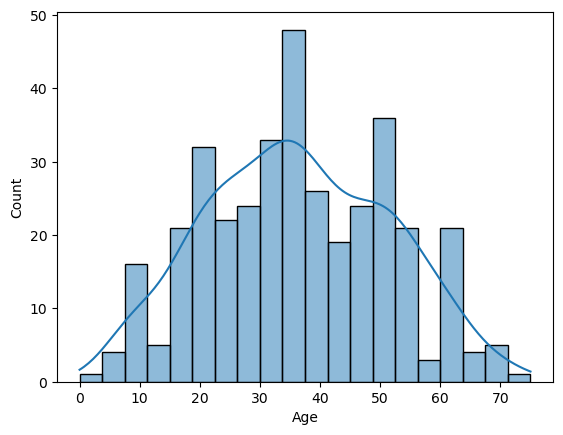

In [26]:
sns.histplot(x=df['Age'],kde=True,bins=20)
plt.show()

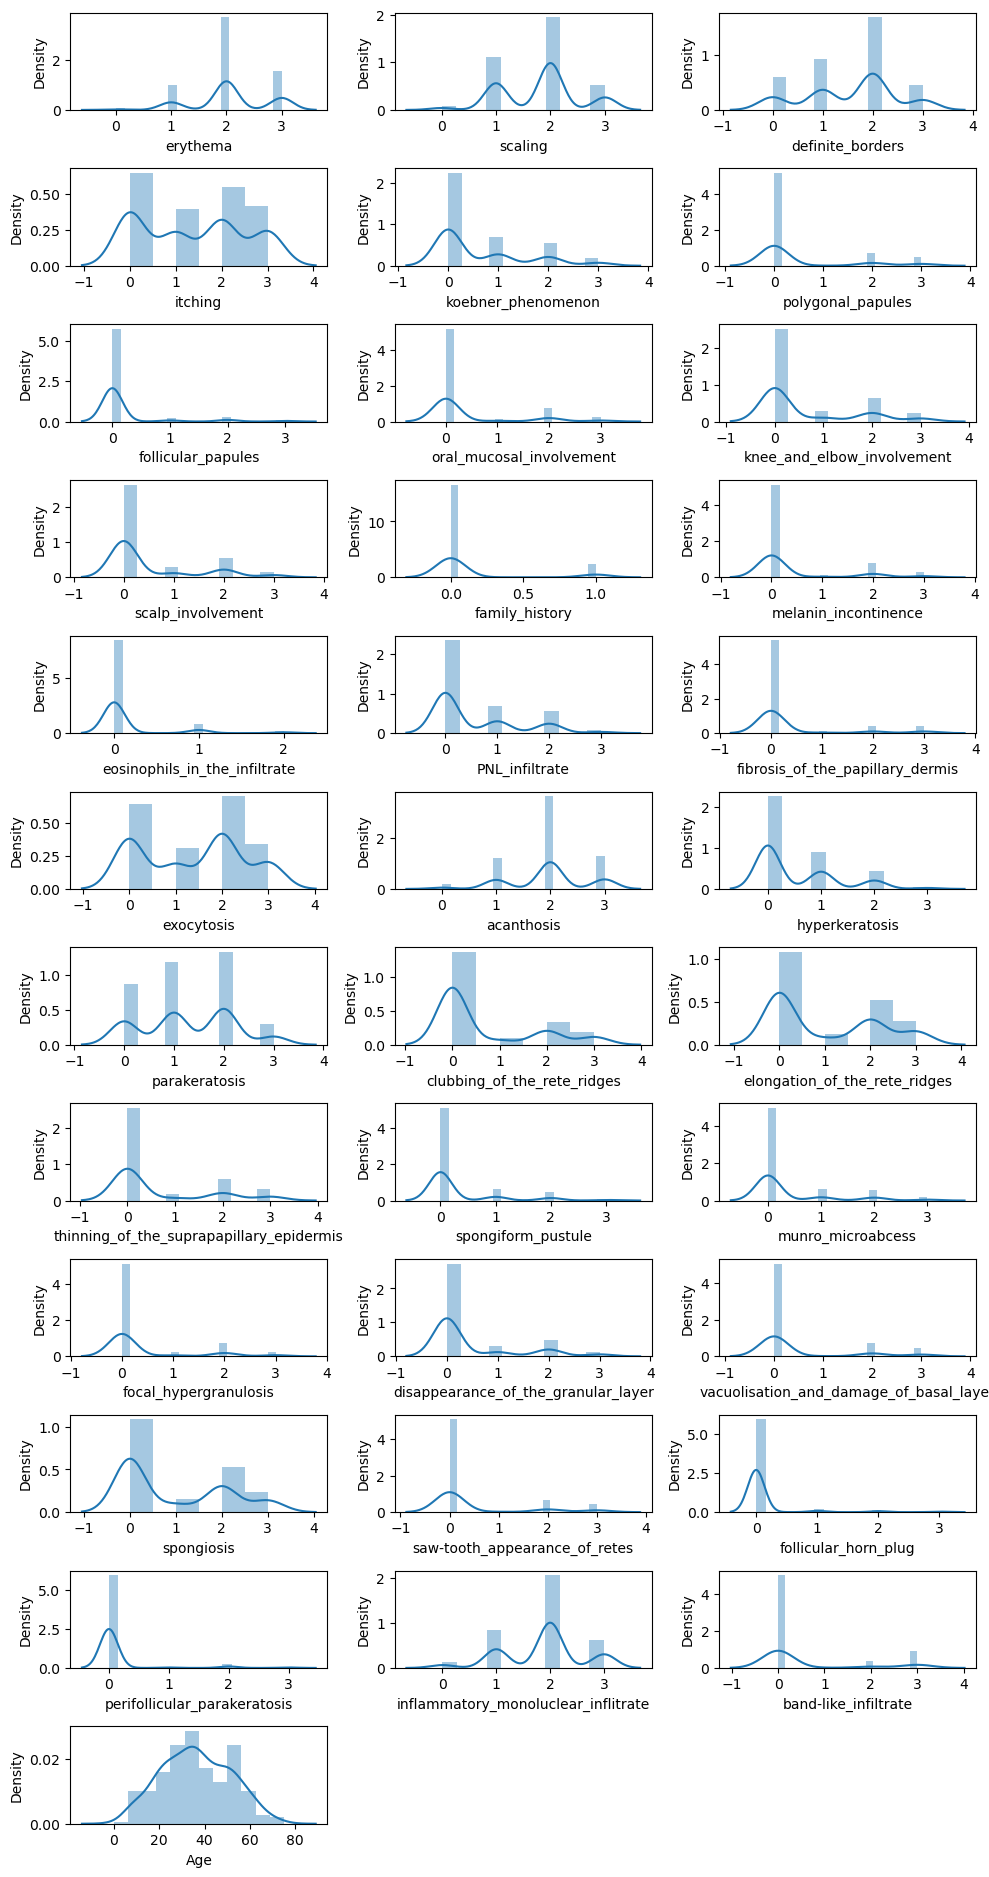

In [27]:
plt.figure(figsize=(10,20))
plot_num=1
for i in x:
    plt.subplot(13,3,plot_num)
    sns.distplot(a=df[i])
    plot_num+=1
plt.tight_layout()

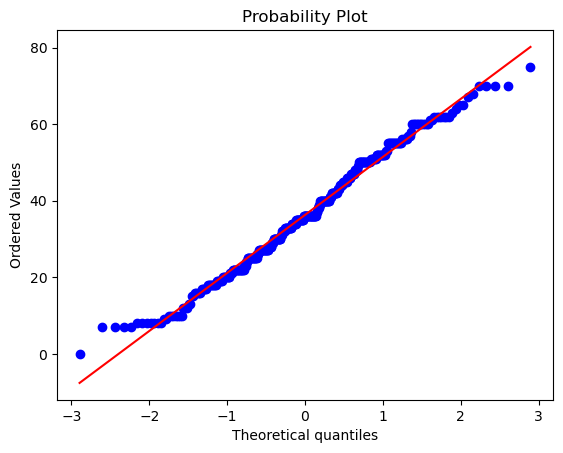

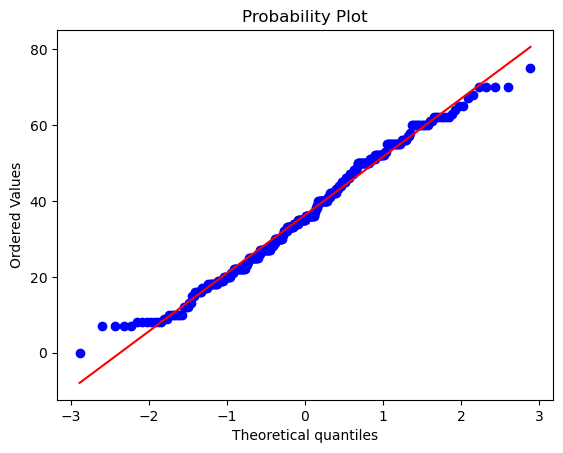

In [28]:
tem=[df,temp_df]
for i in tem:
    stats.probplot(x=i['Age'],plot=plt)
    plt.show()

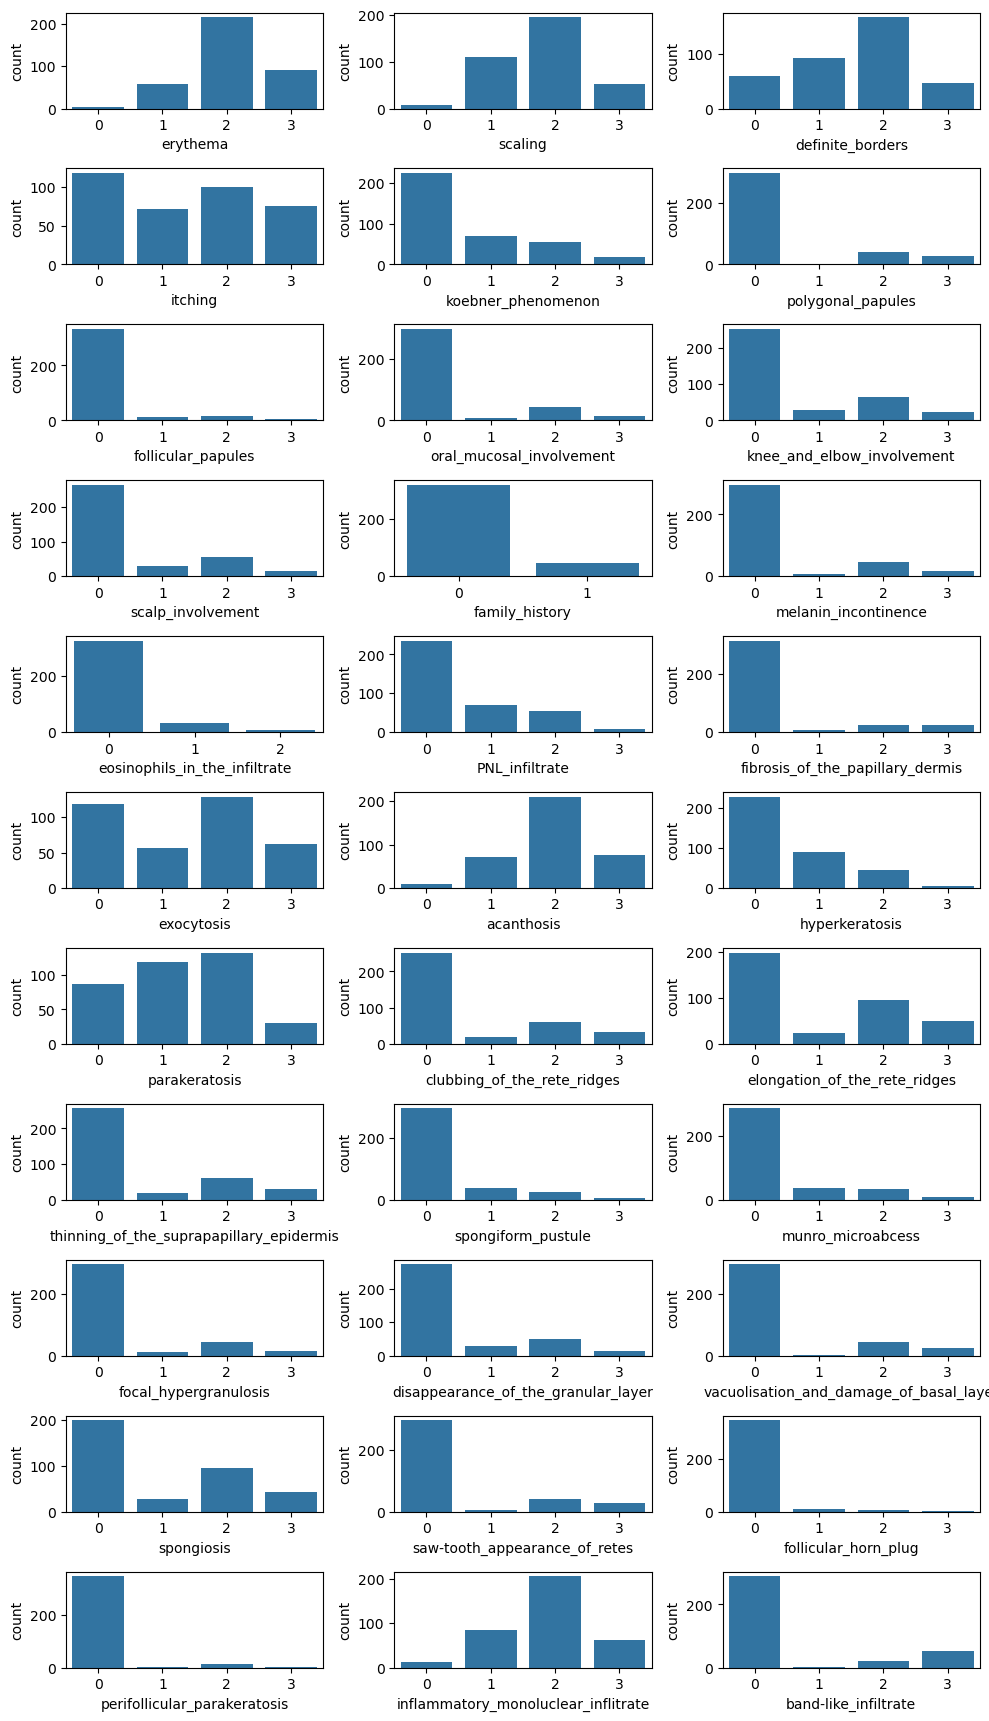

In [29]:
plt.figure(figsize=(10,20))
plot_num=1
for i in x_cat:
    plt.subplot(13,3,plot_num)
    sns.countplot(x=df[i])
    plot_num+=1
plt.tight_layout()

### Insight
In above graphs 0 represents that the symptom is not present.
1 and 2 represents the moderate effect of the symptom. 
3 represents the high effect of the symptom.
- ##### Erythema -
  - No symptom       - 1.09% of patients
  - Moderate symptom - 74.32% of patients
  - High symptom      - 24.59% of patients
- ##### Scaling -
  - No symptom       - 2.19% of patients
  - Moderate symptom - 83.61% of patients
  - High symptom      - 14.21% of patients
- ##### Definite_borders -
  - No symptom       - 16.12% of patients
  - Moderate symptom - 71.31% of patients
  - High symptom      - 12.57% of patients
- ##### Itching -
  - No symptom       - 32.24% of patients
  - Moderate symptom - 46.99% of patients
  - High symptom      - 20.77% of patients
- ##### Koebner_phenomenon -
  - No symptom       - 61.20% of patients
  - Moderate symptom - 33.88% of patients
  - High symptom      - 4.92% of patients
- ##### Polygonal_papules -
  - No symptom       - 81.15% of patients
  - Moderate symptom - 11.48% of patients
  - High symptom      - 7.38% of patients
- ##### Follicular_papules -
  - No symptom       - 90.98% of patients
  - Moderate symptom - 7.38% of patients
  - High symptom      - 1.64% of patients
- ##### Oral_mucosal_involvement -
  - No symptom       - 81.69% of patients
  - Moderate symptom - 14.75% of patients
  - High symptom      - 3.55% of patients
- ##### Knee_and_elbow_involvement -
  - No symptom       - 68.58% of patients
  - Moderate symptom - 25.14% of patients
  - High symptom      - 6.28% of patients
- ##### Scalp_involvement -
  - No symptom       - 72.13% of patients
  - Moderate symptom - 23.50% of patients
  - High symptom      - 4.37% of patients
- ##### Family_history -
  - does not have skin disorder - 87.43% of patients
  - have skin disorder          - 12.57% of patients
- ##### Melanin_incontinence -
  - No symptom       - 80.87% of patients 
  - Moderate symptom - 14.75% of patients
  - High symptom      - 4.37% of patients
- ##### Eosinophils_in_the_infiltrate -
  - No symptom       - 88.52% of patients
  - Moderate symptom - 11.48% of patients
  - High symptom      - 0.0% of patients
- ##### PNL_infiltrate -
  - No symptom       - 64.21% of patients
  - Moderate symptom - 33.88% of patients
  - High symptom      - 1.91% of patients
- ##### Fibrosis_of_the_papillary_dermis -
  - No symptom       - 85.25% of patients
  - Moderate symptom - 8.47% of patients
  - High symptom      - 6.28% of patients
- ##### Exocytosis -
  - No symptom       - 32.24% of patients
  - Moderate symptom - 50.82% of patients
  - High symptom      - 16.94% of patients
- ##### Acanthosis -
  - No symptom       - 2.73% of patients
  - Moderate symptom - 76.78% of patients
  - High symptom      - 20.49% of patients
- ##### Hyperekeratosis -
  - No symptom       - 62.02% of patients
  - Moderate symptom - 36.61% of patients
  - High symptom      - 1.37% of patients
- ##### Parakeratosis -
  - No symptom       - 23.50% of patients
  - Moderate symptom - 68.31% of patients
  - High symptom      - 8.20% of patients
- ##### Clubbing_of_the_rete_ridges -
  - No symptom       - 68.85% of patients
  - Moderate symptom - 21.86% of patients
  - High symptom      - 9.29% of patients
- ##### Elongation_of_the_rete_ridges -
  - No symptom       - 54.10% of patients
  - Moderate symptom - 32.24% of patients
  - High symptom      - 13.66% of patients
- ##### Thinning_of_the_suprapapillary_epidermis -
  - No symptom       - 69.95% of patients
  - Moderate symptom - 21.58% of patients
  - High symptom      - 8.47% of patients
- ##### Spongiform_pustule -
  - No symptom       - 80.87% of patients
  - Moderate symptom - 17.49% of patients
  - High symptom      - 1.64% of patients
- ##### Munro_microabcess -
  - No symptom       - 78.14% of patients
  - Moderate symptom - 19.13% of patients
  - High symptom      - 2.73% of patients
- ##### Focal_hypergranulosis -
  - No symptom       - 80.60% of patients
  - Moderate symptom - 15.30% of patients
  - High symptom      - 4.10% of patients
- ##### Disappearance_of_the_granular_layer -
  - No symptom       - 74.59% of patients
  - Moderate symptom - 21.58% of patients
  - High symptom      - 3.83% of patients
- ##### Vacuolisation_and_damage_of_basal_layer -
  - No symptom       - 80.33% of patients
  - Moderate symptom - 12.57% of patients
  - High symptom      - 7.10% of patients
- ##### Spongiosis -
  - No symptom       - 54.37% of patients
  - Moderate symptom - 33.88% of patients
  - High symptom      - 11.75% of patients
- ##### Saw-tooth_appearance_of_retes -
  - No symptom       - 80.33% of patients
  - Moderate symptom - 12.30% of patients
  - High symptom      - 7.38% of patients
- ##### Follicular_horn_plug -
  - No symptom       - 93.99% of patients
  - Moderate symptom - 4.92% of patients
  - High symptom      - 1.09% of patients
- ##### Perifollicular_parakeratosis -
  - No symptom       - 94.26% of patients
  - Moderate symptom - 4.64% of patients
  - High symptom      - 1.09% of patients
- ##### Inflammatory_monoluclear_inflitrate -
  - No symptom       - 3.55% of patients
  - Moderate symptom - 79.51% of patients
  - High symptom      - 16.94% of patients
- ##### Band-like_infiltrate -
  - No symptom       - 78.96% of patients
  - Moderate symptom - 6.83% of patients
  - High symptom      - 14.21% of patients

In [30]:
# This code is used to get insights
"""temp=df['itching'].value_counts()
print(temp)
for i in range(len(temp)):
    if i==1:
        val=(temp[i]/366)*100
        val+=(temp[i+1]/366)*100
        print(f'{i}-{i+1}  {val:.2f}%')
        continue
    if i==2:
        continue
    val=(temp[i]/366)*100
    print(f'{i}    {val:.2f}%')"""

"temp=df['itching'].value_counts()\nprint(temp)\nfor i in range(len(temp)):\n    if i==1:\n        val=(temp[i]/366)*100\n        val+=(temp[i+1]/366)*100\n        print(f'{i}-{i+1}  {val:.2f}%')\n        continue\n    if i==2:\n        continue\n    val=(temp[i]/366)*100\n    print(f'{i}    {val:.2f}%')"

### Bivariate analysis

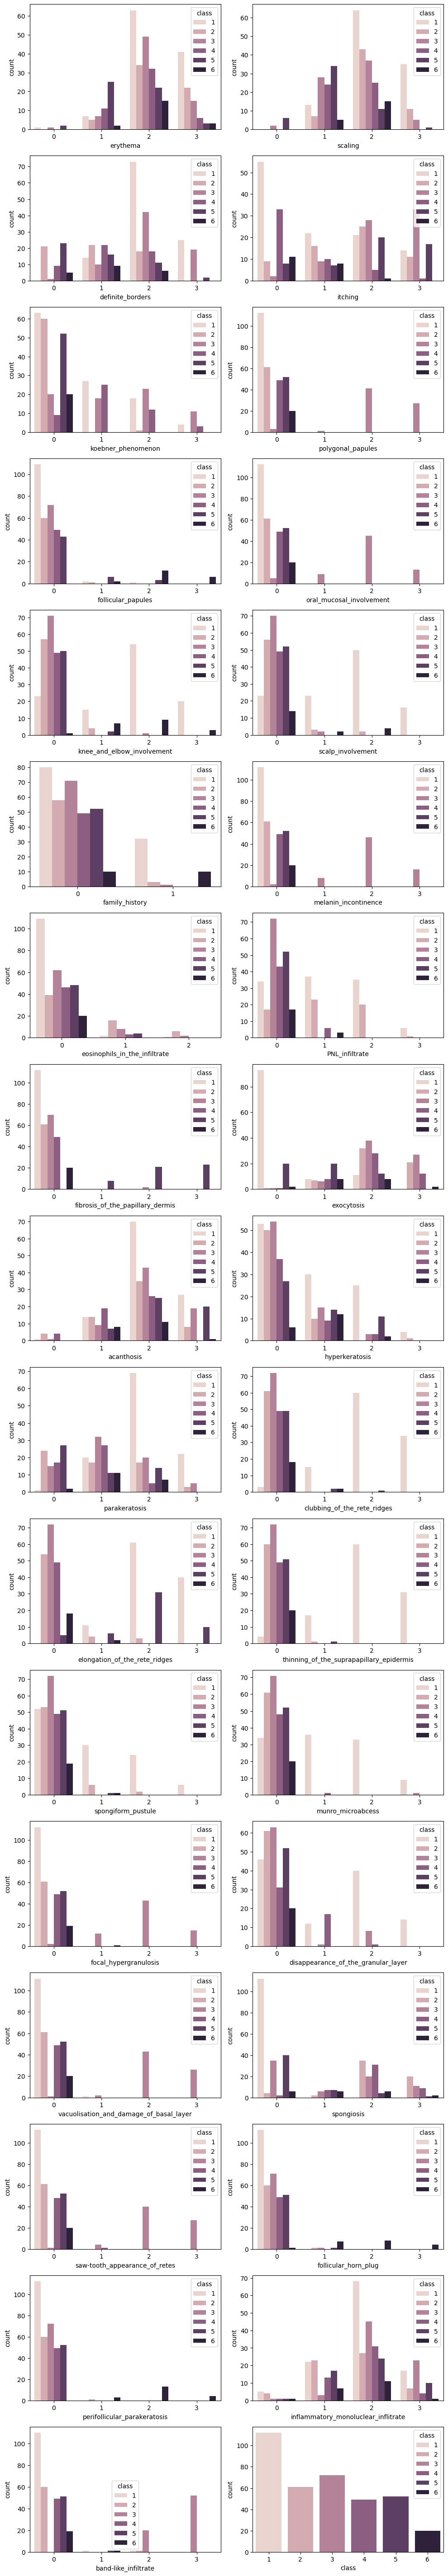

In [31]:
plt.figure(figsize=(10,60))
plot_num=1
for i in df.drop('Age',axis=1):
    plt.subplot(18,2,plot_num)
    sns.countplot(x=df[i],hue=df['class'])
    plot_num+=1
plt.tight_layout()

### Summary of Insights
- Class 1 (psoriasis):
  - clubbibg_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, munro_microabcess and spongiform_pustule are only present in this disease.
  - More than 80% of patients have eythema, scaling, definite_borders, knee_and_elbow_involvement, scalp_involvement, acanthosis, parakeratosis,  elongation_of_the_rete_ridges, inflammatory_monoluclear_inflitrate.
- Class 2 (seboreic dermatitis):
  - There are no symptoms that only found in this disease.
  - More than 80% of patients have erythema, scaling, itching, exocytosis, acanthosis, spongiosis, inflammatory_monoluclear_inflitrate.
- Class 3 (lichen planus):
  - polygonal_papules,oral_mucosal_involvement, melanin_incontinence, focal_hypergranulosis, vacuolisation_and_damage_of_basal_layer, saw-tooth_appearance_of_the_retes and band-like_inflitrate are only found in this disease.
  - More than 80% of patients have erythema, scaling, definite_borders, itching, exocytosis, acanthosis, inflammatory_monoluclear_inflitrate.
- Class 4 (pityriasis rosea):
  - There are no symptoms that inly found in this disease.
  - More that 80% of patients have erythema, scaling, definite_borders, koebner_phenomenon, exocytosis, acanthosis, spongiosis, inflammatory_monoluclear_infilrtate.
- Class 5 (cronic dermatitis):
  -  fibrosis_of_the_papillary_dermis is only found in this disease.
  -  More than 80% of patients have erythema, scaling, itching, acanthosis, elongation_of_the_rete_ridges, inflammatory_monoluclear_inflitrate.
- Class 6 (pityriasis rubra pilaris):
  - follicular_papules, follicular_horn_plug are only found in this disease.
  - More than 80% of patients have erythema, scaling, knee_and_elbow_involvement, exocytosis, acanthosis, parakeratosis, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate.

### Detailed Insights
- Given data is not balanced. Class 1 has 112 records and class 6 has only 20 records. The remaining classes records are as follows:
  class 2 - 61,
  class 3 - 72,
  class 4 - 49 and 
  class 5 - 52
- Erythema - Every class has erythema symptom. Patients with class 2,4,6 will definetely this symptom. 80% -90% of class 4,5,6 and 60% - 80% of class 1,2,3 have moderate effect. 36% of class 1,2 and around 15% of class 3,4,6 have high effect.
- Scaling - Classes 1,2,4,6 definetely have this symptom. 100% of class 4,6 and 90% of class 3 and 80% of class 2 have only moderate effect. More than 30% of class 1 have high effect.
- definite_borders - Class 1 definetely have this symptom. More than 80% of class 4 have moderate effect. More than 25% of class 3 have high effect. More than 44% of class 5 does not have this symptom.
- Itching - 67% of class 4 and around 50% of class 1,6 does not have this symptom. More than 60% of class 2, around 50% of class 3,5,6 and around 30% of class 1,4 have moderate effect. 45% of class 3, 30% of class 5 and 10% - 20% of class 1,2 have high effect.
- Koebner_phenomenon - More than 98% of class 2 and 100% of class 5,6 does not have this symptom. More than 75% of class 4 and around 50% of class 1,3 have mpoderate effect. More than 15% of class 3 have high effect.
- Polygonal_papules - Only class 3 have this symptom. More than 58% have moderate effect and 37% of class 3 have high effect.
- Follicular_papules - Class 6 will definetely have this symptom. Around 100% of class 1,2,3,4 and around 82% of class 5 does not have this effect. Only 70% of class 6 and around 20% of class 5 have moderate effect. 30% of class 6 have high effect.
- Oral_mucosal_involvement - Only class 3 have this symptom. 75% have moderate effect and 18% have high effect.
- Knee_and_elbow_involvement - 100% of class 3,4 and more than 93% of class 2,5 does not have this symptom. 80% of class 6 and more than 60% of class 1 have moderate effect. Around 15% of class 1,6 have high effect
- Scalp_involvement - 100% of class 4,5, more than 90% of class 2,3 and 70% of class 6 does not have this symptom. Around 65% of class 1 and 30% of class 6 have moderate effect and around 14% of class 1 have high effect.
- Family_history - 100% of class 4,5 and more than 95% of class 2,3 does not have family history. 50% of class 6 and arouond 28% of class 1 have family history.
- Melanin_incontinence - Only class 3 have this symptom. 75% have moderate effect and more than 22% have high effect.
- Eosinophils_in_the_infiltrate - 100% of class 6, 90% - 97% of class 1,4,5, around 86% of class 3 and around 63% of class 2 does not have this symptom. 36% of class 2, 6% - 14% of class 3,4,5 and less than 3% of class 1 have moderate effect.
- PNL_infiltrate - 100% of class 3,5, around 86% of class 4,6 and around 29% of class 1,2 does not have this effect. 62% - 72% of class 1,2, 10% - 16% of class 4,6 have moderate effect.Less than 6% of class 1,2 have high effect.
- Fibrosis_of_the_papillary_dermis - Class 5 will definetely have this symptom. In which 56% have moderate effect and 44% have high effect. 100% of class 1,2,4,6 and 97% of class 3 does not have this symptom.
- Exocytosis - 83% of class 1, 38% of class 5 and less than 10% of class 6,4,3,2 does not have this effect. 70% - 80% of class 4,6, 60% - 65% of class 2,3,5 and around 16% of class 1 have moderate effect. 25% - 35% of class 2,3,4 and 10% of class 6 have high effect.
- Acanthosis - Class 5,6 will definetely have this symptom. Less than 2% of class 1,3 and less than 8% of class 2,4 does not have this symptom. More than 90% of class 4,6, 71% - 81% of class 1,2,3 and around 60% of class 5 have moderate effect. Around 38% of class 5, around 25% of class 1,3 and less than 15% of class 2,6 have high effect.
- Hyperkeratosis - 81% of class 2, around 75% of class 3,4, around 50% of class 1,5 and 30% of class 6 does not have this effect. 70% of class 6, around 48% of class 1,5, 24% of class 3,4 and 16% of class 2 have moderate effect. Less than 4% of class 1,2 have high effect.
- Parakeratosis - 50% of class 5, around 36% of class 2,4 does not have this symptom. 90% of class 6 and 50% - 80% of class 1,2,3,4,5 have moderate effect. Around 20% of class 1 and around 5% of class 2,3 have high effect.
- Clubbing_of_the_rete_ridges - 100% of class 2,3,4, 90% - 95% of class 5,6 and lessthan 3% of class 1 does not have this symptom. Around 65% of class 1 and lessthan 10% of class 5,6 have moderate effect. Around 30% of class 1 have high effect.
- Elongation_of_the_rete_ridges - 100% of class 3,4 and 90% of class 6 does not have this symptom. Around 70% of class 5 and 64% of class 1 have moderate effect. 35% of class 1 and around 20% of class 5 have high effect.
- Thinning_of_the_suprapapillary_epidermis - 100% of class 3,4,6 and 98% of class 2,5 does not have this symptom. Around 68% of class 1 have moderate effect. Around 27% of class 1 have high effect.
- Spongiform_pustule - 100% of class 3,4,5, 85% - 95% of class 2,6 and around 45% of class 1 does not have this symptom. Around 48% of class 1 and lessthan 15% of class 2,6 have moderate effect. Around 5% of class 1 have high effect.
- Munro_microabcess - 100% of class 2,5,6, around 97% of class 3,4 and 30% of class 1 does not have this effect. Aroound 60% of class 1 have moderate effect. Lessthan 10% of class 1 have high effect.
- Focal_hypergranulosis - 100% of class 1,2,4,5 and 95% of class 6 does not this symptom. Around 76% of class 6 have moderate effect and around 20% have high effect.
- Disappearance_of_the_granular_layer - 100% of class 2,5,6, 87% of class 3, 63% of class 4 and around 40% of class 1 does not have this effect. 36% - 46% of class 1,4 have moderate effect. Around 12% of class 1 have high effect.
- Vacuolisation_and_damage_of_basal_layer - 100% of class 1,2,4,5,6 does not have this symptom. From class 3 around 60% have moderate effect and around 35% have high effect.
- Spongiosis - 100% of class 1, around 75% of class 5 and around 50% of class 3 does not have this effect. 60% - 70% of class 2,4,6 have moderate effect. Around 30% of class 2 and 10% - 20% of class 3,4,6 have high effect.
- Saw-tooth_appearance_of_retes - Only class have this symptom. Around 60% have moderate effect and around 37% have high effect.
- Follicular_horn_plug - Only class 6 have this effect. 75% have moderatre effect and 20% have high effect.
- Perifollicular_parakeratosis - Class 6 will definetely have this symptom. 80% have moderate effect and 20% have high effect.
- Inflammatory_monoluclear_inflitrate - Every class have this symptom. 80% - 90% of class 1,2,4,5,6 have moderate effect. Around 30% of class 3, 10% - 20% of class 1,2,5 have high effect.
- Band-like_infiltrate - class 3 will definetely have this symptom. Around 27% have moderate effect and around 72% have high effect.

In [32]:
k=dict(df['class'].value_counts())
key=['psoriasis','lichen planus','seboreic dermatitis','cronic dermatitis','pityriasis rosea','pityriasis rubra pilaris']
pair={}
for i in range(len(k)):
    pair[key[i]]=k[i+1]

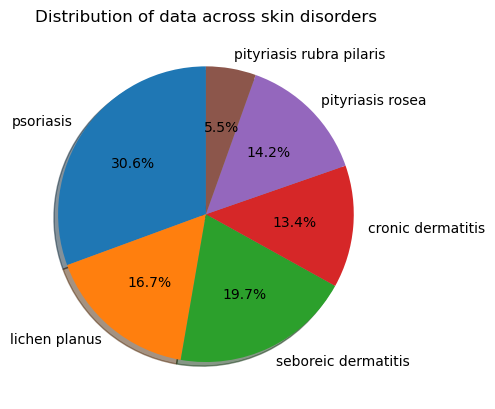

In [33]:
plt.pie(x=pair.values(),labels=pair.keys(),autopct='%2.1f%%',startangle=90,shadow=True)
plt.title('Distribution of data across skin disorders')
plt.show()

### Insights
- psoriasis (class 1): 112 -> 30.6%,
- lichen planus (class 3): 61 -> 16.7%,
- seboreic dermatitis (class 2): 72 -> 19.7%,
- cronic dermatitis (class 5): 49 -> 13.4%,
- pityriasis rosea (class 4): 52 -> 14.2%,
- pityriasis rubra pilaris (class 6): 20 -> 5.5%.': 20

In [35]:
"""Remove # below to get the columns name"""
#print(df.columns)

'Remove # below to get the columns name'

In [36]:
"""This code gives the distribution of symptom in percentage with respect to the disease.
   Enter the symptom name."""

"""var=input("Enter symptom:")
dict={1:112,2:61,3:72,4:49,5:52,6:20}
for i in dict:
    print(f'Class {i} -> {dict[i]}')
    for j in range(4):
        temp=df.loc[df['class']==i]
        val=len(temp.loc[temp[var]==j])
        if j==0 or j==3:
            print(f'type {j}     : {val}  {(val/dict[i])*100:.2f}%')
        if j==1:
            val+=len(temp.loc[temp[var]==j+1])
            print(f'type {j}and{j+1} : {val}  {(val/dict[i])*100:.2f}%')
    print(" "*30)"""

'var=input("Enter symptom:")\ndict={1:112,2:61,3:72,4:49,5:52,6:20}\nfor i in dict:\n    print(f\'Class {i} -> {dict[i]}\')\n    for j in range(4):\n        temp=df.loc[df[\'class\']==i]\n        val=len(temp.loc[temp[var]==j])\n        if j==0 or j==3:\n            print(f\'type {j}     : {val}  {(val/dict[i])*100:.2f}%\')\n        if j==1:\n            val+=len(temp.loc[temp[var]==j+1])\n            print(f\'type {j}and{j+1} : {val}  {(val/dict[i])*100:.2f}%\')\n    print(" "*30)'

In [37]:
"""This code gives the distribution of disease with respect to symptom 
   Enter the symptom name."""

"""var=input("Enter symptom:")
for j in sorted(df[var].unique()):
    temp=df.loc[df[var]==j]
    if j==1:
        tot=len(temp)+len(df.loc[df[var]==j+1])
        print("Type:",j,'and',j+1,"->",tot,"  ",(tot/366)*100)
        continue
    if j==3 or j==0:
        print("Type:",j,"->",len(df.loc[df[var]==j]),"  ",(len(df.loc[df[var]==j])/366)*100)
    for i in sorted(df['class'].unique()):
        if j==2:
            temp=df.loc[df[var]==j]
            val= len(temp.loc[df['class']==i,var])
            #print(val,'$')
            size=len(temp['class'])
            temp=df.loc[df[var]==j-1]
            val+=len(temp.loc[df['class']==i,var])
            #print(val,'$')
            size+=len(temp['class'])
            sol= (val/size)*100
            print("Class" ,i,":",val,end=" ")
            print(f'{" "*8}{sol:.2f}%')
            continue
        val=len(temp.loc[df['class']==i,var])
        size=len(temp['class'])
        print("Class" ,i,":",val,end=" ")
        print(f'{" "*4}{(val/size)*100:.2f}%')
    print(f'{"*"*30}')"""

'var=input("Enter symptom:")\nfor j in sorted(df[var].unique()):\n    temp=df.loc[df[var]==j]\n    if j==1:\n        tot=len(temp)+len(df.loc[df[var]==j+1])\n        print("Type:",j,\'and\',j+1,"->",tot,"  ",(tot/366)*100)\n        continue\n    if j==3 or j==0:\n        print("Type:",j,"->",len(df.loc[df[var]==j]),"  ",(len(df.loc[df[var]==j])/366)*100)\n    for i in sorted(df[\'class\'].unique()):\n        if j==2:\n            temp=df.loc[df[var]==j]\n            val= len(temp.loc[df[\'class\']==i,var])\n            #print(val,\'$\')\n            size=len(temp[\'class\'])\n            temp=df.loc[df[var]==j-1]\n            val+=len(temp.loc[df[\'class\']==i,var])\n            #print(val,\'$\')\n            size+=len(temp[\'class\'])\n            sol= (val/size)*100\n            print("Class" ,i,":",val,end=" ")\n            print(f\'{" "*8}{sol:.2f}%\')\n            continue\n        val=len(temp.loc[df[\'class\']==i,var])\n        size=len(temp[\'class\'])\n        print("Class" ,i

### Feature Selection

In [38]:
df.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,0.172059,0.042126,0.075228,0.224095,-0.354595,0.021565,0.064165,-0.055432,0.210030,0.157558,0.007819,0.167868,0.169773,0.113464,-0.013761,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.004688,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,0.181491,-0.074856,0.042211,0.282486,-0.383585,-0.110809,0.108095,0.013149,0.296752,0.320740,0.139073,0.330343,0.297783,0.186366,-0.085021,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.016162,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,0.115844,0.311398,-0.132021,0.041330,-0.274414,-0.205391,0.189761,0.043894,0.361213,0.387205,0.201702,0.369266,0.246204,0.242232,0.291147,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.136404,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,-0.136615,0.359207,0.095434,-0.145288,0.203032,0.214822,0.067080,-0.008460,-0.075568,-0.232224,-0.124058,-0.244052,-0.152689,-0.056056,0.363488,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.047196,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,-0.083247,0.385687,-0.046366,-0.169377,-0.247451,0.145960,-0.054449,0.002635,-0.036801,0.008471,-0.163819,0.026064,-0.002065,0.157646,0.400409,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.080392,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,-0.151841,0.907044,0.028824,-0.314515,-0.158046,0.379643,0.129210,-0.164355,-0.042098,-0.294857,-0.400544,-0.287468,-0.206530,-0.201893,0.880972,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.095831,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,0.192866,-0.136165,-0.087452,-0.119728,0.019698,-0.010869,-0.096592,0.189201,-0.029654,-0.115856,-0.105356,-0.128361,-0.057283,-0.095856,-0.118710,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.370886,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,-0.151825,0.869231,0.014122,-0.303735,-0.140047,0.360138,0.101565,-0.155177,-0.039258,-0.284750,-0.386815,-0.277615,-0.199452,-0.190861,0.884351,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.110315,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,0.341915,-0.272314,-0.198670,0.331709,-0.227428,-0.529946,0.116711,0.229538,0.439951,0.721602,0.496067,0.644669,0.447252,0.518155,-0.267508,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.077821,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,0.292728,-0.256779,-0.076957,0

<Axes: >

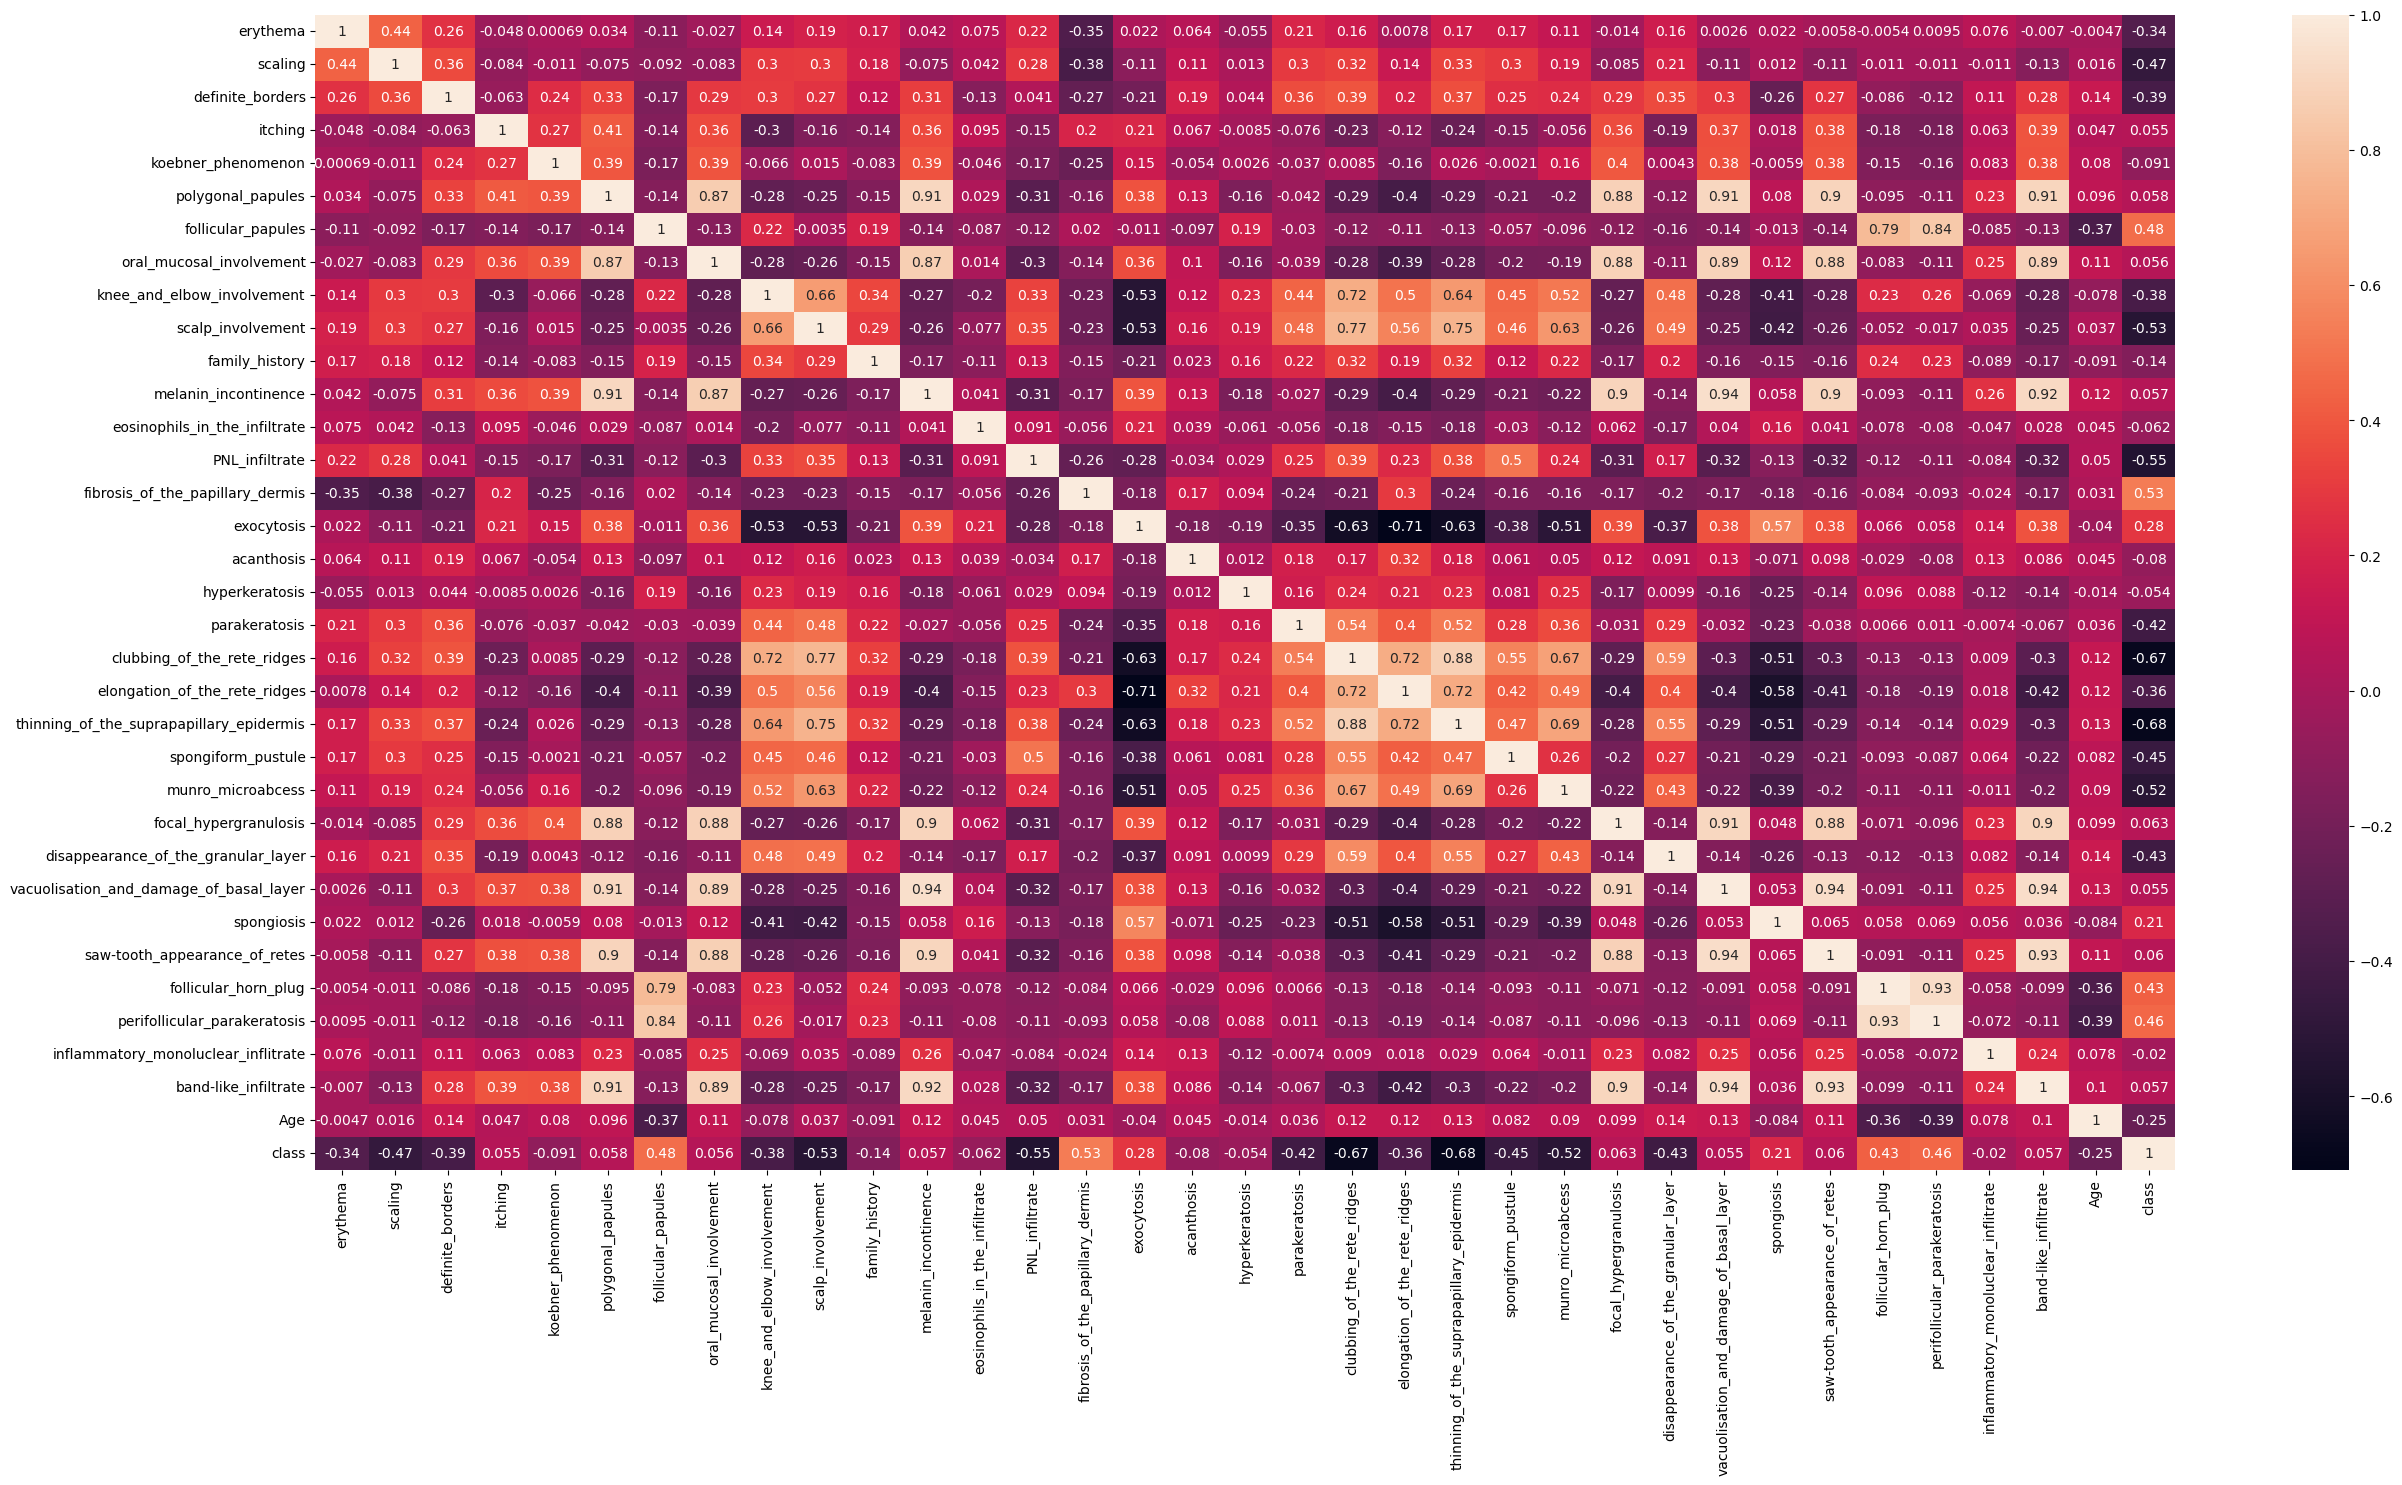

In [39]:
temp=df.loc[df['class']==5]
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)

- Since given features are all categorical, we cannot depend on the correlation matrix.
- Because corelation matrix gives the relation between two columns in terms of magnitude and direction. Typically used for continuous data.

##### Applying Chi2 Test
- Applying chi2 to find the realtion between features and target.
- The more the chi2 value, more the raltion between the independent variable and dependent variable.

In [40]:
from sklearn.feature_selection import chi2

In [227]:
chi2_scores={}
flag1=True
flag2=True
for i in df:
    var=chi2(df[[i]],df["class"])
    chi2_scores[i]=var[0]
#print(chi2_scores)

In [229]:
"""print("Less relation variables:\n","-"*30)
for index,value in chi2_scores.items():
    if value<50:
        print(index,value)
print()
print("More relation variables:\n","-"*30)
for index,value in chi2_scores.items():
    if value>650:
        print(index,value)"""

'print("Less relation variables:\n","-"*30)\nfor index,value in chi2_scores.items():\n    if value<50:\n        print(index,value)\nprint()\nprint("More relation variables:\n","-"*30)\nfor index,value in chi2_scores.items():\n    if value>650:\n        print(index,value)'

### Insights from chi2 test
- Less relation variables and their chi2 score (considered chi2 < 50):
  - erythema [12.68338231]
  - scaling [28.57099668]
  - acanthosis [12.81023425]
  - hyperkeratosis [47.42565418]
  - inflammatory_monoluclear_inflitrate [8.90538676]
- Good relation varibles and their chi2 score (considered chi2 > 650):
  - polygonal_papules [669.66666667]
  - fibrosis_of_the_papillary_dermis [687.99989577]
  - vacuolisation_and_damage_of_basal_layer [671.80000713]
  - saw-tooth_appearance_of_retes [667.74228547]
  - perifollicular_parakeratosis [690.57857143]
  - band-like_infiltrate [759.36493847]

### Scalling

In [230]:
from sklearn.preprocessing import MinMaxScaler

In [231]:
sc=MinMaxScaler(feature_range=(0,3))

In [232]:
df['Age']=sc.fit_transform(df[['Age']])

### Model Creation

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
x=df.drop('class',axis=1)
y=df['class']

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=41)

In [236]:
x_train

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
356,2,2,2,2,2,0,0,0,3,0,1,0,0,0,0,0,2,2,2,2,3,3,0,2,0,3,0,0,0,0,0,0,0,3.00
95,2,1,0,2,2,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0.72
294,2,1,3,0,1,0,0,0,0,2,0,0,0,0,0,0,3,0,2,2,3,3,0,0,0,2,0,0,0,0,0,2,0,1.36
285,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0.88
169,2,2,3,3,1,3,0,2,0,0,0,3,0,0,0,2,3,0,2,0,0,0,0,0,2,0,3,2,2,0,0,3,3,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,3,3,2,0,0,0,0,0,2,2,0,0,0,0,0,0,2,1,2,2,3,2,1,0,0,1,0,0,0,0,0,2,0,2.20
89,1,1,1,0,2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1.24
243,2,2,2,2,0,0,0,0,2,2,1,0,0,1,0,0,3,0,3,2,2,2,0,2,0,2,0,0,0,0,0,2,0,2.00
321,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,0,1.28


### Balancing

In [237]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [238]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [239]:
y_train.value_counts()

class
1    93
3    56
2    51
4    40
5    38
6    14
Name: count, dtype: int64

In [240]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [241]:
x_sm.shape

(558, 34)

In [242]:
print(y_sm.value_counts())
print(y_sm.unique())

class
1    93
4    93
2    93
3    93
5    93
6    93
Name: count, dtype: int64
[1 4 2 3 5 6]


## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model_lr=LogisticRegression(multi_class='ovr',solver='saga')

In [60]:
model_lr.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr', solver='saga')

In [61]:
y_pred=model_lr.predict(x_test)
y_train_pred=model_lr.predict(x_sm)

In [64]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,roc_auc_score

##### Training score

In [231]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.985663082437276

In [232]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.95      0.97      0.96        93
           3       1.00      1.00      1.00        93
           4       0.97      0.95      0.96        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



##### Testing score

In [233]:
acc=accuracy_score(y_test,y_pred)
acc

1.0

In [234]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

1.0

In [236]:
pre_lr=precision_score(y_test,y_pred,average='weighted')
pre_lr

1.0

In [237]:
rec_lr=recall_score(y_test,y_pred,average='weighted')
rec_lr

1.0

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [66]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,19,0,0,0,0,0
2,0,10,0,0,0,0
3,0,0,16,0,0,0
4,0,0,0,9,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,6


In [62]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

In [63]:
cv=StratifiedKFold(n_splits=5)

In [86]:
params={
    'multi_class':['auto','ovr','multinomial'],
    'penalty':['l2', 'elasticnet'],
    'solver':['newton-cg', 'sag', 'saga','lbfgs','newton-cholesky'],
    'class_weight':['balanced',None]}

In [87]:
grid=GridSearchCV(estimator=model_lr,param_grid=params,cv=cv,scoring='accuracy',n_jobs=-1,verbose=3)

In [88]:
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='ovr', solver='saga'),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs',
                                    'newton-cholesky']},
             scoring='accuracy', verbose=3)

In [89]:
grid.best_params_

{'class_weight': 'balanced',
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'sag'}

In [90]:
grid.best_score_

0.9821106821106822

In [92]:
model_lr=LogisticRegression(class_weight='balanced',penalty='l2',solver='sag',multi_class='auto')

In [93]:
model_lr.fit(x_sm,y_sm)

LogisticRegression(class_weight='balanced', multi_class='auto', solver='sag')

In [94]:
y_pred=model_lr.predict(x_test)

In [95]:
y_train_pred=model_lr.predict(x_sm)

###### Training acc

In [96]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.992831541218638

In [97]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.99      0.97      0.98        93
           3       1.00      1.00      1.00        93
           4       0.97      0.99      0.98        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [98]:
pd.crosstab(y_sm,y_train_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,93,0,0,0,0,0
2,0,90,0,3,0,0
3,0,0,93,0,0,0
4,0,1,0,92,0,0
5,0,0,0,0,93,0
6,0,0,0,0,0,93


###### Testing acc

In [99]:
acc=accuracy_score(y_test,y_pred)
acc

0.9864864864864865

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      0.94      0.97        16
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           0.99        74
   macro avg       0.98      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [101]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,19,0,0,0,0,0
2,0,10,0,0,0,0
3,0,0,15,1,0,0
4,0,0,0,9,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,6


In [65]:
lr_cross_val=cross_val_score(estimator=model_lr,X=x,y=y,scoring='accuracy',verbose=3,cv=cv)

[CV] END ................................ score: (test=0.986) total time=   0.1s
[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] END ................................ score: (test=0.959) total time=   0.1s
[CV] END ................................ score: (test=0.986) total time=   0.1s
[CV] END ................................ score: (test=0.945) total time=   0.1s


In [67]:
# Before hyperparameter tuning
lr_mean_cross_val=np.mean(lr_cross_val)
print(lr_cross_val)
print(f'Mean of cross validation score: {lr_mean_cross_val}')

[0.98648649 1.         0.95890411 0.98630137 0.94520548]
Mean of cross validation score: 0.9753794890781192


In [103]:
# After hyperparameter tuning
print(cross_val)
print(f'Mean of cross validation score: {np.mean(cross_val):.2f}')

[0.98648649 0.97260274 0.97260274 0.98630137 0.93150685]
Mean of cross validation score: 0.97


## Support Vector Machine

In [68]:
from sklearn.svm import SVC

In [69]:
model_svm=SVC()

In [70]:
model_svm.fit(x_sm,y_sm)

SVC()

In [240]:
y_pred=model_svm.predict(x_test)

In [241]:
y_train_pred=model_svm.predict(x_sm)

##### Training score

In [242]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.9874551971326165

##### Testing score

In [243]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

1.0

In [244]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

1.0

In [247]:
pre_sv=precision_score(y_test,y_pred,average='weighted')
pre_sv

1.0

In [248]:
rec_sv=recall_score(y_test,y_pred,average='weighted')
rec_sv

1.0

In [80]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.99      0.97      0.98        93
           3       1.00      1.00      1.00        93
           4       0.97      0.99      0.98        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [120]:
params={'C':[1,10,100],
        'gamma':['scale','auto'],
        'kernel':['linear','poly','rbf','sigmoid'],
        'degree':[1,2],
        'coef0':[0.1,0.2,0.5,1.0,1.01,1.001]}

In [121]:
grid=GridSearchCV(estimator=model_svm,param_grid=params,scoring='accuracy',n_jobs=-1,cv=cv,verbose=3)

In [122]:
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'coef0': [0.1, 0.2, 0.5, 1.0, 1.01, 1.001],
                         'degree': [1, 2], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [134]:
grid.best_params_

{'C': 10, 'coef0': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [123]:
grid.best_score_

0.9892696267696268

In [116]:
model_svm=SVC(C= 10, coef0= 1.0, degree= 2, gamma= 'auto', kernel= 'poly')

In [117]:
model_svm.fit(x_sm,y_sm)

SVC(C=10, coef0=1.0, degree=2, gamma='auto', kernel='poly')

In [118]:
y_pred=model_svm.predict(x_test)

In [119]:
y_train_pred=model_svm.predict(x_sm)

##### Training score

In [120]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.996415770609319

##### Testing score

In [121]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

1.0

In [122]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

1.0

In [123]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.99      0.99      0.99        93
           3       1.00      1.00      1.00        93
           4       0.99      0.99      0.99        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



In [71]:
sv_cross_val=cross_val_score(estimator=model_svm,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.986) total time=   0.0s
[CV] END ................................ score: (test=0.959) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.945) total time=   0.0s


In [72]:
# Before hyperparameter tuning
sv_mean_cross_val=np.mean(sv_cross_val)
print(sv_cross_val)
print(f'Mean of cross validation score: {sv_mean_cross_val}')

[1.         0.98630137 0.95890411 1.         0.94520548]
Mean of cross validation score: 0.9780821917808218


In [125]:
# After hyperparameter tuning
print(cross_val)
print(f'Mean of cross validation score: {np.mean(cross_val):.2f}')

[0.97297297 0.98630137 0.97260274 0.98630137 0.93150685]
Mean of cross validation score: 0.97


## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
error=[]
for k in range(1,30,2):
    dummy_model=KNeighborsClassifier(n_neighbors=k)
    dummy_model.fit(x_sm,y_sm)
    y_pred=dummy_model.predict(x_test)
    error.append((y_test!=y_pred).sum()/len(y_test)*100)

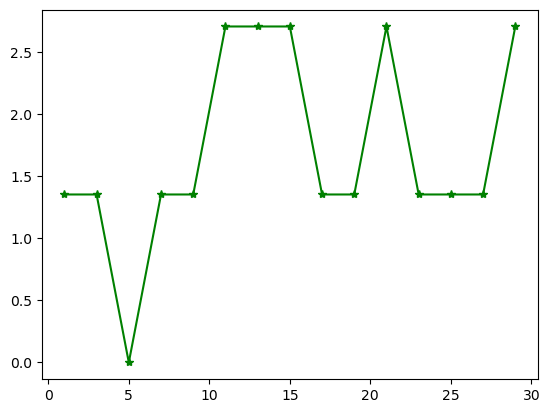

In [75]:
plt.plot(range(1,30,2),error,marker='*',color='green')

In [76]:
model_kn=KNeighborsClassifier(n_neighbors=5)

In [77]:
model_kn.fit(x_sm,y_sm)

KNeighborsClassifier()

In [78]:
y_train_pred=model_kn.predict(x_sm)
y_pred=model_kn.predict(x_test)

##### Training score

In [79]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.9910394265232975

In [256]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.99      0.96      0.97        93
           3       1.00      1.00      1.00        93
           4       0.96      0.99      0.97        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [257]:
pd.crosstab(y_sm,y_train_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,93,0,0,0,0,0
2,0,89,0,4,0,0
3,0,0,93,0,0,0
4,0,1,0,92,0,0
5,0,0,0,0,93,0
6,0,0,0,0,0,93


##### Testing score

In [258]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.9864864864864865

In [259]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.9864864864864865

In [260]:
pre_kn=precision_score(y_test,y_pred,average='weighted')
pre_kn

0.9878378378378377

In [261]:
rec_kn=recall_score(y_test,y_pred,average='weighted')
rec_kn

0.9864864864864865

In [315]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         6

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [316]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,19,0,0,0,0,0
1,0,10,0,0,0,0
2,0,0,16,0,0,0
3,0,0,0,9,0,0
4,0,0,0,0,14,0
5,0,0,0,0,0,6


In [317]:
params={'n_neighbors':[5,7,9,11,13,15],
        'weights':['uniform','distance'],
        'algorithm':['ball_tree', 'kd_tree', 'brute'],
        'p':[1,2],
        'metric':['euclidean','manhatten','minkwoski']}

In [318]:
grid=GridSearchCV(estimator=model_kn,param_grid=params,scoring='accuracy',cv=cv,verbose=3,n_jobs=-1)

In [319]:
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhatten', 'minkwoski'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [320]:
grid.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [321]:
grid.best_score_

0.9838963963963965

In [322]:
model_kn=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=5,p=1,weights='uniform',metric='euclidean')

In [323]:
model_kn.fit(x_sm,y_sm)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', p=1)

In [324]:
y_train_pred=model_kn.predict(x_sm)
y_pred=model_kn.predict(x_test)

##### Training score

In [325]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.9910394265232975

In [326]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      0.95      0.97        93
           2       1.00      1.00      1.00        93
           3       0.96      1.00      0.98        93
           4       0.99      1.00      0.99        93
           5       1.00      1.00      1.00        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [327]:
pd.crosstab(y_sm,y_train_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,93,0,0,0,0,0
1,0,88,0,4,1,0
2,0,0,93,0,0,0
3,0,0,0,93,0,0
4,0,0,0,0,93,0
5,0,0,0,0,0,93


##### Testing score

In [328]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.9864864864864865

In [329]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.9864864864864865

In [330]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        16
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         6

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [331]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,19,0,0,0,0,0
1,0,9,0,1,0,0
2,0,0,16,0,0,0
3,0,0,0,9,0,0
4,0,0,0,0,14,0
5,0,0,0,0,0,6


In [80]:
kn_cross_val=cross_val_score(estimator=model_kn,X=x,y=y,cv=cv,scoring='accuracy',verbose=3)

[CV] END ................................ score: (test=0.959) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.904) total time=   0.0s


In [81]:
# before hyper perameter tuning 
kn_mean_cross_val=np.mean(kn_cross_val)
print(kn_cross_val)
print(f'Mean of cross validation score: {kn_mean_cross_val}')

[0.95945946 0.97260274 0.97260274 1.         0.90410959]
Mean of cross validation score: 0.961754905590522


In [333]:
# After hyperparameter tuning
print(cross_val)
print(f'Mean of cross validation score: {np.mean(cross_val):.2f}')

[0.95945946 0.97260274 0.97260274 1.         0.90410959]
Mean of cross validation score: 0.96


## Naive bayes

In [212]:
from sklearn.naive_bayes import MultinomialNB

In [213]:
model_nb=MultinomialNB()

In [214]:
model_nb.fit(x_sm,y_sm)

MultinomialNB()

In [215]:
y_train_pred=model_nb.predict(x_sm)
y_pred=model_nb.predict(x_test)

##### Training score

In [138]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.996415770609319

In [139]:
f1=f1_score(y_sm,y_train_pred,average='weighted')
f1

0.996415770609319

In [140]:
pre=precision_score(y_test,y_pred,average='weighted')
pre_nb

0.9873873873873873

In [141]:
rec=recall_score(y_test,y_pred,average='weighted')
rec_nb

0.9864864864864865

In [97]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.99      0.91      0.95        93
           3       1.00      1.00      1.00        93
           4       0.92      0.99      0.95        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.98      0.98       558



In [98]:
pd.crosstab(y_sm,y_train_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,93,0,0,0,0,0
2,0,85,0,8,0,0
3,0,0,93,0,0,0
4,0,1,0,92,0,0
5,0,0,0,0,93,0
6,0,0,0,0,0,93


##### Testing score

In [157]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

1.0

In [216]:
f1_nb=f1_score(y_sm,y_train_pred,average='weighted')
f1

0.9856614246068456

In [159]:
pre_nb=precision_score(y_test,y_pred,average='weighted')
pre_nb

1.0

In [160]:
rec_nb=recall_score(y_test,y_pred,average='weighted')
rec_nb

1.0

In [101]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.99      0.91      0.95        93
           3       1.00      1.00      1.00        93
           4       0.92      0.99      0.95        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.98      0.98       558



In [102]:
pd.crosstab(y_sm,y_train_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,93,0,0,0,0,0
2,0,85,0,8,0,0
3,0,0,93,0,0,0
4,0,1,0,92,0,0
5,0,0,0,0,93,0
6,0,0,0,0,0,93


In [103]:
cv=StratifiedKFold(n_splits=5)

In [86]:
nb_cross_val=cross_val_score(estimator=model_nb,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=0.986) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.945) total time=   0.0s


In [87]:
nb_mean_cross_val=np.mean(nb_cross_val)
print(nb_cross_val)
print(f'Mean of the cross val: {nb_mean_cross_val}')

[0.98648649 1.         0.97260274 1.         0.94520548]
Mean of the cross val: 0.9808589411329137


## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [264]:
model_dt=DecisionTreeClassifier()

In [110]:
model_dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [111]:
y_pred=model_dt.predict(x_test)

In [112]:
y_train_pred=model_dt.predict(x_sm)

##### Training score

In [113]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

1.0

In [114]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.972972972972973

In [343]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.90      0.90        10
           2       1.00      0.94      0.97        16
           3       0.89      0.89      0.89         9
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         6

    accuracy                           0.96        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.96      0.96      0.96        74



In [344]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [279]:
cv=StratifiedKFold(n_splits=5)

In [388]:
params={
    'splitter':['best','random'],
    'criterion': ['log_loss','entropy'],
    'max_depth': [9,10,11,12,13,14],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4,5,6,7,8]
    }

In [389]:
grid=GridSearchCV(estimator=model_dt,param_grid=params,scoring='accuracy',n_jobs=-1,cv=cv,verbose=3)

In [390]:
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(criterion='log_loss',
                                              max_depth=11, min_samples_leaf=2,
                                              random_state=41),
             n_jobs=-1,
             param_grid={'criterion': ['log_loss', 'entropy'],
                         'max_depth': [9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [391]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [406]:
grid.best_score_

0.9803410553410554

In [89]:
model_dt=DecisionTreeClassifier(
 criterion='log_loss',
 max_depth=11,
 min_samples_leaf= 2,
 min_samples_split=2,
 splitter= 'best',
 random_state=41)

In [90]:
model_dt.fit(x_sm,y_sm)

DecisionTreeClassifier(criterion='log_loss', max_depth=11, min_samples_leaf=2,
                       random_state=41)

In [267]:
y_train_pred=model_dt.predict(x_sm)

In [268]:
y_pred=model_dt.predict(x_test)

##### Training score

In [269]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.992831541218638

In [270]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.97      0.99      0.98        93
           3       1.00      1.00      1.00        93
           4       0.99      0.98      0.98        93
           5       1.00      1.00      1.00        93
           6       1.00      0.99      0.99        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [271]:
pd.crosstab(y_sm,y_train_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,93,0,0,0,0,0
2,0,92,0,1,0,0
3,0,0,93,0,0,0
4,0,2,0,91,0,0
5,0,0,0,0,93,0
6,0,1,0,0,0,92


##### Testing score

In [272]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.9459459459459459

In [274]:
pre_dt=precision_score(y_test,y_pred,average='weighted')
pre_dt

0.9524774774774775

In [275]:
rec_dt=recall_score(y_test,y_pred,average='weighted')
rec_dt

0.9459459459459459

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.90      0.90      0.90        10
           3       1.00      0.94      0.97        16
           4       0.82      1.00      0.90         9
           5       1.00      1.00      1.00        14
           6       1.00      0.67      0.80         6

    accuracy                           0.95        74
   macro avg       0.94      0.92      0.92        74
weighted avg       0.95      0.95      0.94        74



In [124]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,19,0,0,0,0,0
2,0,9,0,1,0,0
3,0,0,15,1,0,0
4,0,0,0,9,0,0
5,0,0,0,0,14,0
6,1,1,0,0,0,4


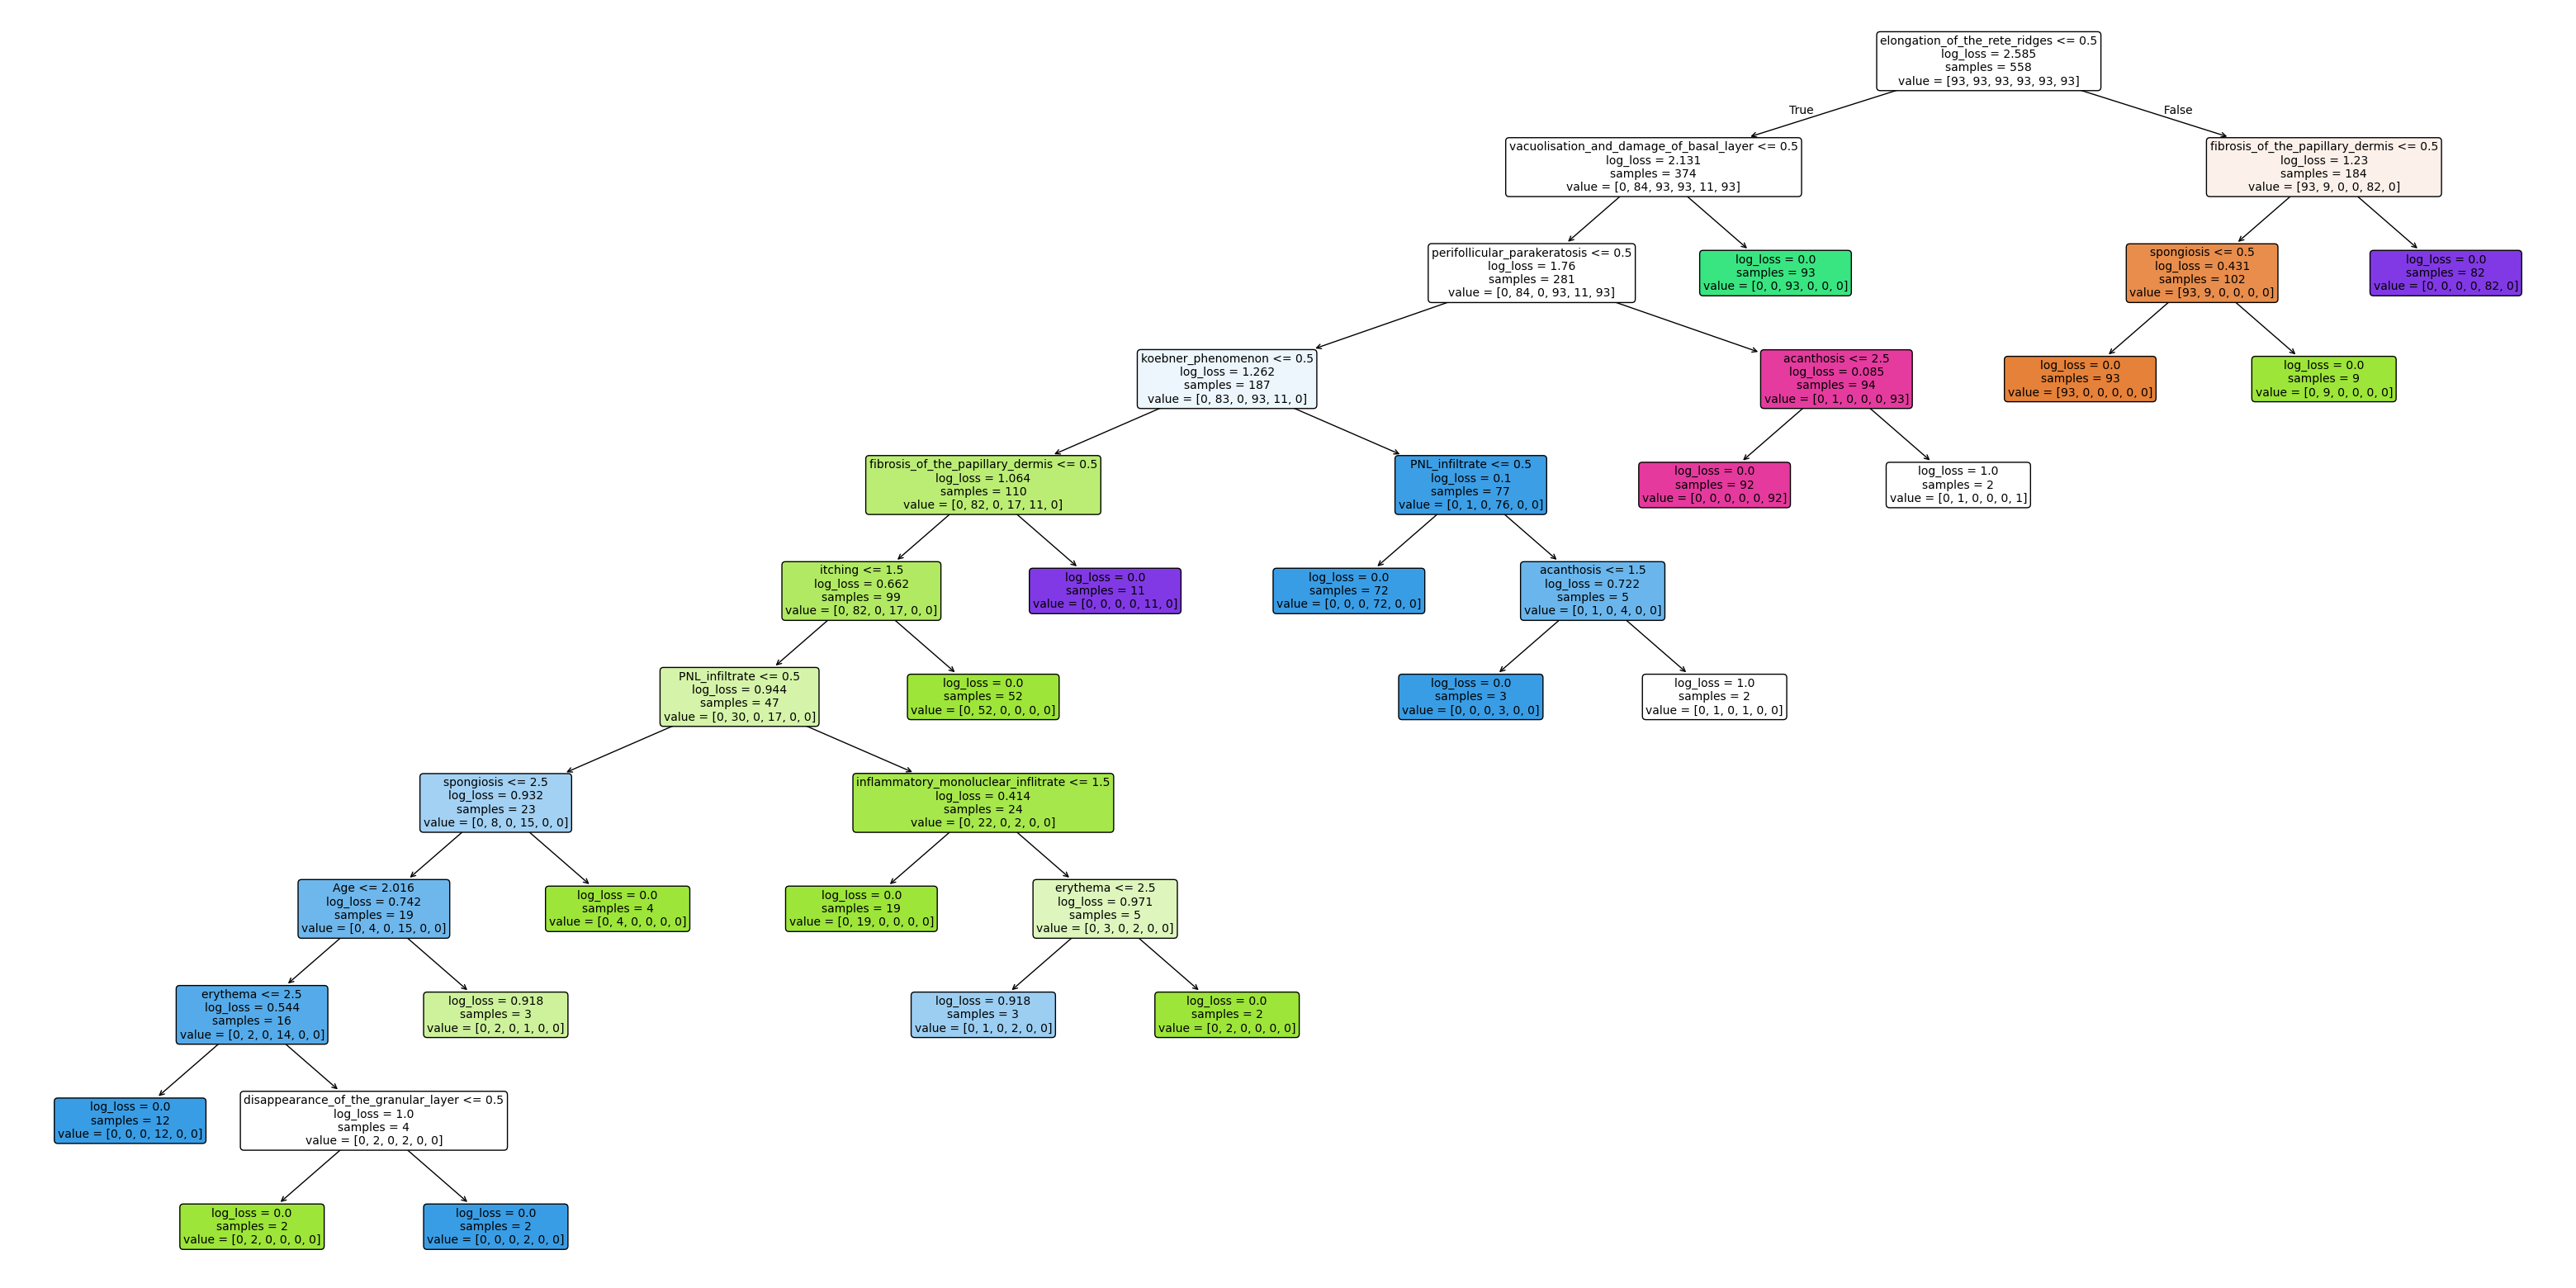

In [125]:
plt.figure(figsize=(40,20))
plot_tree(model_dt,feature_names=x_sm.columns,fontsize=10,filled=True,rounded=True)
plt.show()

In [91]:
dt_cross_val=cross_val_score(estimator=model_dt,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=0.905) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=0.945) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=0.959) total time=   0.0s


In [346]:
# before Hyperparameter tuning
print(cross_val)
print(f'Mean of cross validation score: {np.mean(cross_val):.2f}')

[0.91891892 0.95890411 0.87671233 0.91780822 0.93150685]
Mean of cross validation score: 0.92


In [92]:
# After hyperparameter tuning
dt_mean_cross_val=np.mean(dt_cross_val)
print(dt_cross_val)
print(f'Mean of cross validation score: {dt_mean_cross_val}')

[0.90540541 0.97260274 0.94520548 0.97260274 0.95890411]
Mean of cross validation score: 0.9509440947797112


## Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
model_rf=RandomForestClassifier(n_estimators=5)

In [363]:
model_rf.fit(x_sm,y_sm)

RandomForestClassifier(n_estimators=5)

In [364]:
y_pred=model_rf.predict(x_test)
y_train_pred=model_rf.predict(x_sm)

##### Training score

In [365]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

1.0

In [366]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        93

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



In [367]:
pd.crosstab(y_sm,y_train_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,93,0,0,0,0,0
1,0,93,0,0,0,0
2,0,0,93,0,0,0
3,0,0,0,93,0,0
4,0,0,0,0,93,0
5,0,0,0,0,0,93


##### Testing score

In [368]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.9864864864864865

In [369]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.9864864864864865

In [370]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        16
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         6

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [371]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,19,0,0,0,0,0
1,0,9,0,1,0,0
2,0,0,16,0,0,0
3,0,0,0,9,0,0
4,0,0,0,0,14,0
5,0,0,0,0,0,6


In [341]:
model_rf=RandomForestClassifier()

In [420]:
params={
    'n_estimators':list(range(5,20)),
    'class_weight': [None,'balanced'],
    'criterion': ['gini','entropy'],
    'max_depth': [None,1,5,10,15,20],
    'max_features':[None,'sqrt','log2','auto'],
    'max_leaf_nodes': [None,1,2,3],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4]
    }

In [421]:
cv=StratifiedKFold(n_splits=5)

In [422]:
grid=RandomizedSearchCV(estimator=model_rf,param_distributions=params,scoring='accuracy',n_iter=100,cv=cv,n_jobs=-1,verbose=3)

In [439]:
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(n_estimators=5), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 5, 10, 15, 20],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         'auto'],
                                        'max_leaf_nodes': [None, 1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 14, 15, 16, 17,
                                                         18, 19]},
                   scoring='accuracy', verbose=3)

In [874]:
grid.best_params_

{'n_estimators': 12,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [441]:
grid.best_score_

0.9874678249678249

In [95]:
model_rf=RandomForestClassifier(
    n_estimators=12,
    min_samples_split=3,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    max_features='log2',
    max_depth=10,
    criterion='gini',
    class_weight='balanced',
    random_state=41)

In [96]:
model_rf.fit(x_sm,y_sm)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=3,
                       n_estimators=12, random_state=41)

In [278]:
y_train_pred=model_rf.predict(x_sm)
y_pred=model_rf.predict(x_test)

##### Training score

In [279]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.9946236559139785

In [280]:
f1=f1_score(y_sm,y_train_pred,average='weighted')
f1

0.9946235005058535

In [281]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.98      0.99      0.98        93
           3       1.00      1.00      1.00        93
           4       0.99      0.98      0.98        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [282]:
pd.crosstab(y_sm,y_train_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,93,0,0,0,0,0
2,0,92,0,1,0,0
3,0,0,93,0,0,0
4,0,2,0,91,0,0
5,0,0,0,0,93,0
6,0,0,0,0,0,93


##### Testing score

In [283]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.9864864864864865

In [284]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.9865015182034093

In [285]:
pre_rf=precision_score(y_test,y_pred,average='weighted')
pre_rf

0.9873873873873873

In [286]:
rec_rf=recall_score(y_test,y_pred,average='weighted')
rec_rf

0.9864864864864865

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [140]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,19,0,0,0,0,0
2,0,10,0,0,0,0
3,0,0,16,0,0,0
4,0,0,0,9,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,6


In [97]:
rf_cross_val=cross_val_score(estimator=model_rf,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=0.959) total time=   0.0s
[CV] END ................................ score: (test=0.986) total time=   0.0s
[CV] END ................................ score: (test=0.959) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.959) total time=   0.0s


In [373]:
# Before hyperparameter tuning
print(cross_val)
print(f'Mean of cross validation score: {np.mean(cross_val):.2f}')

[0.94594595 1.         0.95890411 0.95890411 0.94520548]
Mean of cross validation score: 0.96


In [98]:
# After hyperparameter tuning
rf_mean_cross_val=np.mean(rf_cross_val)
print(rf_cross_val)
print(f'Mean of cross validation score: {rf_mean_cross_val}')

[0.95945946 0.98630137 0.95890411 1.         0.95890411]
Mean of cross validation score: 0.9727138097001111


## Bagging

#### Using bagging classifier

In [99]:
from sklearn.ensemble import BaggingClassifier

In [100]:
model_bg=BaggingClassifier(estimator=model_svm,n_estimators=10,random_state=41)

In [101]:
model_bg.fit(x_sm,y_sm)

BaggingClassifier(estimator=SVC(), random_state=41)

In [289]:
y_train_pred=model_bg.predict(x_sm)
y_pred=model_bg.predict(x_test)

##### Training score

In [290]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.9802867383512545

In [291]:
f1=f1_score(y_sm,y_train_pred,average='weighted')
f1

0.9802861685214626

In [292]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       0.94      0.95      0.94        93
           3       1.00      1.00      1.00        93
           4       0.95      0.94      0.94        93
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        93

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.98      0.98       558



In [293]:
pd.crosstab(y_sm,y_train_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,93,0,0,0,0,0
2,0,88,0,5,0,0
3,0,0,93,0,0,0
4,0,6,0,87,0,0
5,0,0,0,0,93,0
6,0,0,0,0,0,93


##### Testing score

In [294]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

1.0

In [295]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

1.0

In [296]:
pre_bg=precision_score(y_test,y_pred,average='weighted')
pre_bg

1.0

In [298]:
rec_bg=recall_score(y_test,y_pred,average='weighted')
rec_bg

1.0

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [154]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,19,0,0,0,0,0
2,0,10,0,0,0,0
3,0,0,16,0,0,0
4,0,0,0,9,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,6


In [102]:
bg_cross_val=cross_val_score(estimator=model_bg,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=0.986) total time=   0.1s
[CV] END ................................ score: (test=0.986) total time=   0.1s
[CV] END ................................ score: (test=0.959) total time=   0.1s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=0.932) total time=   0.2s


In [103]:
bg_mean_cross_val=np.mean(bg_cross_val)
print(bg_cross_val)
print(f'Mean of the cross val: {bg_mean_cross_val}')

[0.98648649 0.98630137 0.95890411 1.         0.93150685]
Mean of the cross val: 0.9726397630507219


#### Using voting classifier

In [200]:
from sklearn.ensemble import VotingClassifier

In [201]:
model_lr=LogisticRegression(multi_class='ovr',solver='saga')

In [202]:
model_svm=SVC()

In [203]:
model_nb=MultinomialNB()

In [204]:
model_vt=VotingClassifier([('lr',model_lr),('svm',model_svm),('nb',model_nb)])

In [205]:
model_vt.fit(x_sm,y_sm)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='ovr',
                                                 solver='saga')),
                             ('svm', SVC()), ('nb', MultinomialNB())])

In [206]:
y_train_pred=model_vt.predict(x_sm)
y_pred=model_vt.predict(x_test)

##### Training score

In [187]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.985663082437276

In [188]:
f1=f1_score(y_sm,y_train_pred,average='weighted')
f1

0.9856614246068456

In [189]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       0.97      0.95      0.96        93
           2       1.00      1.00      1.00        93
           3       0.95      0.97      0.96        93
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        93

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [190]:
pd.crosstab(y_sm,y_train_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,93,0,0,0,0,0
1,0,88,0,5,0,0
2,0,0,93,0,0,0
3,0,3,0,90,0,0
4,0,0,0,0,93,0
5,0,0,0,0,0,93


##### Testing score

In [191]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

1.0

In [207]:
f1_vt=f1_score(y_test,y_pred,average='weighted')
f1

0.9856614246068456

In [193]:
pre_vt=precision_score(y_test,y_pred,average='weighted')
pre_vt

1.0

In [194]:
rec_vt=recall_score(y_test,y_pred,average='weighted')
rec_vt

1.0

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         6

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [171]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,19,0,0,0,0,0
2,0,10,0,0,0,0
3,0,0,16,0,0,0
4,0,0,0,9,0,0
5,0,0,0,0,14,0
6,0,0,0,0,0,6


In [110]:
vt_cross_val=cross_val_score(estimator=model_vt,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=0.959) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=0.945) total time=   0.2s


In [111]:
vt_mean_cross_val=np.mean(vt_cross_val)
print(vt_cross_val)
print(f'Mean of the cross val: {vt_mean_cross_val}')

[1.         1.         0.95890411 1.         0.94520548]
Mean of the cross val: 0.9808219178082191


## XGBoost

In [112]:
from xgboost import XGBClassifier

In [113]:
model_xg=XGBClassifier()

In [114]:
x=df.drop('class',axis=1)
y=df['class']

In [115]:
y=y.reset_index()

In [116]:
y=y.drop('index',axis=1)

In [117]:
for i in range(len(y['class'])):
    y['class'][i]=y['class'][i]-1

In [118]:
y=pd.Series(data=y['class'])

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=41)

In [120]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [121]:
x_sm.shape

(558, 34)

In [122]:
y_sm.unique()

array([0, 3, 1, 2, 4, 5], dtype=int64)

In [123]:
y_test.unique()

array([0, 1, 4, 3, 5, 2], dtype=int64)

In [325]:
model_xg.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [326]:
y_train_pred=model_xg.predict(x_sm)
y_pred=model_xg.predict(x_test)

##### Training score

In [327]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

1.0

In [328]:
f1=f1_score(y_sm,y_train_pred,average='weighted')
f1

1.0

In [190]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        93

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



In [191]:
pd.crosstab(y_sm,y_train_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,93,0,0,0,0,0
1,0,93,0,0,0,0
2,0,0,93,0,0,0
3,0,0,0,93,0,0
4,0,0,0,0,93,0
5,0,0,0,0,0,93


##### Testing score

In [192]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.9864864864864865

In [193]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.9865015182034093

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         9
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         6

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [195]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,19,0,0,0,0,0
1,0,10,0,0,0,0
2,0,0,15,0,1,0
3,0,0,0,9,0,0
4,0,0,0,0,14,0
5,0,0,0,0,0,6


In [196]:
cross_val=cross_val_score(estimator=model_xg,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=0.932) total time=   0.0s
[CV] END ................................ score: (test=0.959) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=0.973) total time=   0.0s
[CV] END ................................ score: (test=0.932) total time=   0.0s


In [212]:
#before hyperparameter tuning
print(cross_val)
print(f'Mean of the cross val: {np.mean(cross_val):.2f}')

[0.93243243 0.95890411 0.97260274 0.97260274 0.93150685]
Mean of the cross val: 0.95


In [822]:
params = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [860]:
grid=RandomizedSearchCV(estimator=model_xg,param_distributions=params,n_iter=10,scoring='accuracy',cv=cv,verbose=3)

In [906]:
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=3.2, learning_rate=0.2, max_depth=8, n_estimators=65, reg_alpha=6.4, reg_lambda=0.8;, score=0.946 total time=   0.0s
[CV 2/5] END gamma=3.2, learning_rate=0.2, max_depth=8, n_estimators=65, reg_alpha=6.4, reg_lambda=0.8;, score=0.946 total time=   0.1s
[CV 3/5] END gamma=3.2, learning_rate=0.2, max_depth=8, n_estimators=65, reg_alpha=6.4, reg_lambda=0.8;, score=0.955 total time=   0.0s
[CV 4/5] END gamma=3.2, learning_rate=0.2, max_depth=8, n_estimators=65, reg_alpha=6.4, reg_lambda=0.8;, score=0.955 total time=   0.0s
[CV 5/5] END gamma=3.2, learning_rate=0.2, max_depth=8, n_estimators=65, reg_alpha=6.4, reg_lambda=0.8;, score=0.946 total time=   0.0s
[CV 1/5] END gamma=200, learning_rate=0.06, max_depth=10, n_estimators=115, reg_alpha=12.8, reg_lambda=0.4;, score=0.170 total time=   0.0s
[CV 2/5] END gamma=200, learning_rate=0.06, max_depth=10, n_estimators=115, reg_alpha=12.8, reg_lambda=0.4;, score=0.17

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0.8, grow_policy=None,
                                           import...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   scoring='accuracy', verbose=3)

In [878]:
grid.best_params_

{'reg_lambda': 3.2,
 'reg_alpha': 1.6,
 'n_estimators': 130,
 'max_depth': 14,
 'learning_rate': 0.7,
 'gamma': 0}

In [908]:
grid.best_score_

0.9821267696267697

In [124]:
model_xg=XGBClassifier(reg_lambda= 3.2,
 reg_alpha= 1.6,
 n_estimators= 130,
 max_depth= 14,
 learning_rate= 0.7,
 gamma=0)

In [125]:
model_xg.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=130, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [126]:
y_train_pred=model_xg.predict(x_sm)
y_pred=model_xg.predict(x_test)

##### Training score

In [127]:
acc_train=accuracy_score(y_sm,y_train_pred)
acc_train

0.996415770609319

In [333]:
f1=f1_score(y_sm,y_train_pred,average='weighted')
f1

1.0

In [334]:
print(classification_report(y_sm,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        93

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



In [335]:
pd.crosstab(y_sm,y_train_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,93,0,0,0,0,0
1,0,93,0,0,0,0
2,0,0,93,0,0,0
3,0,0,0,93,0,0
4,0,0,0,0,93,0
5,0,0,0,0,0,93


##### Testing score

In [336]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.9864864864864865

In [337]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.9865015182034093

In [338]:
pre_xg=precision_score(y_test,y_pred,average='weighted')
pre_xg

0.9873873873873873

In [339]:
rec_xg=recall_score(y_test,y_pred,average='weighted')
rec_xg

0.9864864864864865

In [207]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         9
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         6

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [208]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5
class,,,,,,
0,19,0,0,0,0,0
1,0,10,0,0,0,0
2,0,0,15,0,1,0
3,0,0,0,9,0,0
4,0,0,0,0,14,0
5,0,0,0,0,0,6


In [128]:
xg_cross_val=cross_val_score(estimator=model_xg,X=x,y=y,scoring='accuracy',cv=cv,verbose=3)

[CV] END ................................ score: (test=0.946) total time=   0.4s
[CV] END ................................ score: (test=0.959) total time=   0.4s
[CV] END ................................ score: (test=0.973) total time=   0.3s
[CV] END ................................ score: (test=0.959) total time=   0.3s
[CV] END ................................ score: (test=0.959) total time=   0.3s


In [130]:
# After hyperparameter tuning
xg_mean_cross_val=np.mean(xg_cross_val)
print(xg_cross_val)
print(f'Mean of the cross val: {xg_mean_cross_val}')

[0.94594595 0.95890411 0.97260274 0.95890411 0.95890411]
Mean of the cross val: 0.9590522028878192


## Conclusion

In [131]:
models=['Logistic Regression','SVM','K Nearest Neighbours','Naive Bayes','Decision Tree','Random Forest','Bagging Classifier','Voting Classifier','XG Boost']

In [224]:
models_score=[lr_mean_cross_val,sv_mean_cross_val,kn_mean_cross_val,nb_mean_cross_val,dt_mean_cross_val,rf_mean_cross_val,bg_mean_cross_val,vt_mean_cross_val,xg_mean_cross_val]

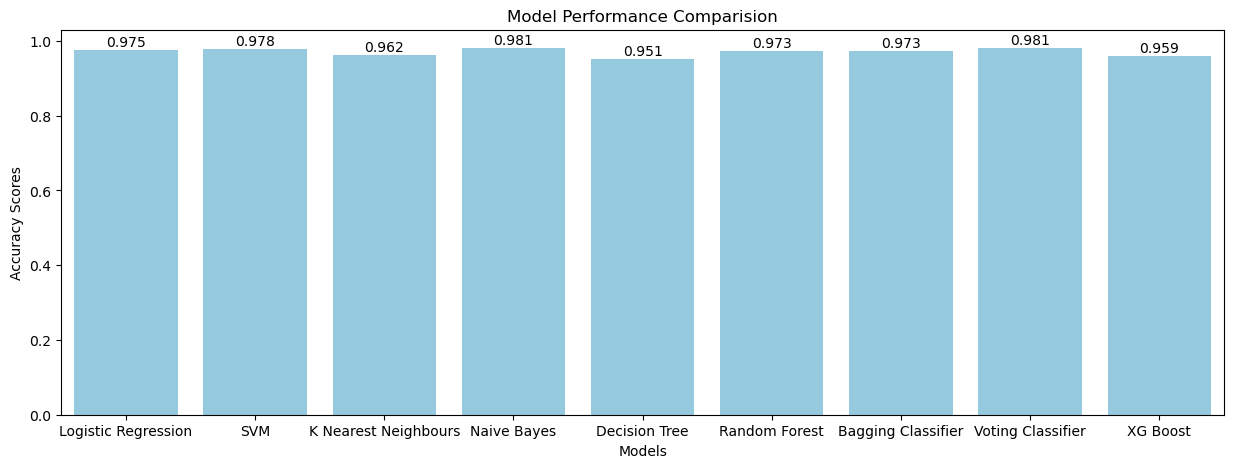

In [221]:
plt.figure(figsize=(15,5))
bar_plot=sns.barplot(x=models,y=models_score,color='skyblue')
for index, value in enumerate(models_score):
    bar_plot.text(index,value+0.001,f'{value:.3f}',ha='center',va='bottom',fontsize=10)
plt.title('Model Performance Comparision')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.show()

Above mentioned scores are average of the model's accuracy obtained from cross validation scores.

- Since Naive Bayes and Voting Classifier got equal performance score, now using F1-Score to determine the best between both models. 

In [243]:
best_model=['Naive Bayes','Voting CLassifier']
f1_scores=[f1_nb,f1_vt]

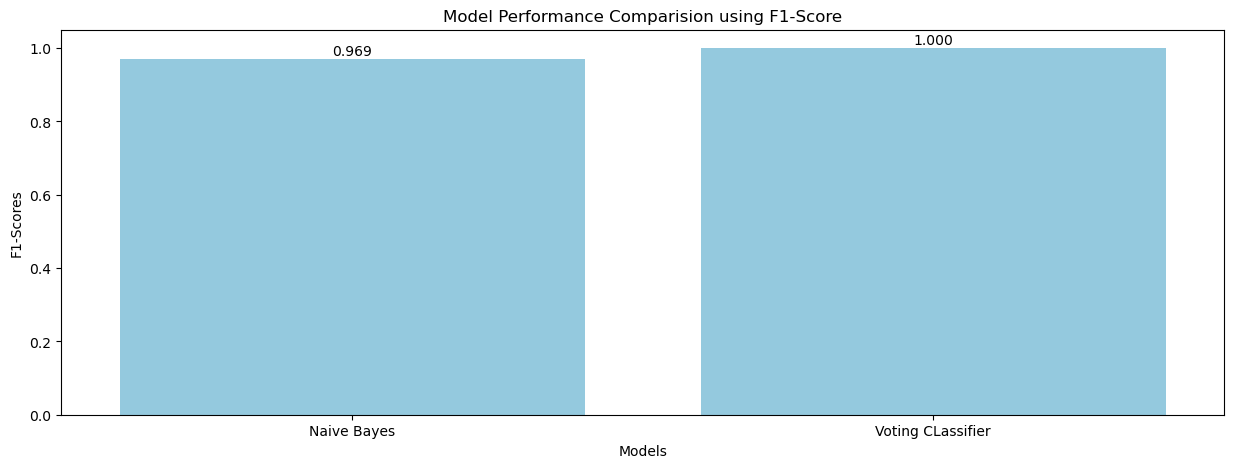

In [244]:
plt.figure(figsize=(15,5))
bar_plot=sns.barplot(x=best_model,y=f1_scores,color='skyblue')
for index, value in enumerate(f1_scores):
    bar_plot.text(index,value+0.001,f'{value:.3f}',ha='center',va='bottom',fontsize=10)
plt.title('Model Performance Comparision using F1-Score')
plt.xlabel('Models')
plt.ylabel('F1-Scores')
plt.show()

### Insights to select the model
- Voting Classifier got 100% score. Which is suitable model for this case.
- In terms of time complexity and space complexity Naive Bayes comes top between the both models.

## Suggestion to doctors in classifying the skin disease at early stages
- If patients have Polygonal_pauples, then disease should be classified as Lichen Planus.
- If patients have Follicular_papules, then disease should be classified as Pityriasis Rubra Pilaris.
- There are no any other clinical features can be considered to classify the disease at early stage.
- How-ever there are some Histopathilogical features which can classify the diseases. Those are :
  - "Clubbibg_of_the_rete_ridges", "Thinning_of_the_suprapapillary_epidermis", "Munro_microabcess" are only found in Psoriasis.
  - "Fibrosis of the papillary dermis" is only found in Cronic dermatites.
- Seboreic dermatites and Pityriasis rosea diseases cannot be identified based on any particular symptom.